In [1]:
# To import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
#read dataset

df = pd.read_csv("water_potability.csv")

In [3]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
#checking for missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
# get the missing values for each columns
df.isnull().sum() / df.shape[0] * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [7]:

# Summary statistics of the dataset
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
fig = px.histogram(df, x='ph', color='Potability',
            title='The pH values of water according to the potability category.')
fig.update_layout(bargap=0.2, # gap between bars of adjacent location coordinates
bargroupgap=0.1, # gap between bars of the same location coordinates
xaxis_title_text='pH Range') # xaxis label
fig.show()

In [9]:
#for correcting the missing values of ph with fillna method
df['ph'].fillna(df['ph'].mean(), inplace=True)

In [10]:
#correcting the missing values of Sulfate
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

In [11]:
#correcting the missing values of Trihalomethanes
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [12]:
#checking again for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### Creating Interactive Feature Classification

* Direct Chemical Interactions:
pH affects solubility and reactions (e.g., pH with Hardness, Solids, Chloramines, Sulfate).

* Ion Content and Conductivity:
Solids, Sulfate, Hardness affect Conductivity.

* Disinfection Byproducts:
Chloramines, Organic_carbon affect Trihalomethanes.

* Turbidity:
Influenced by Solids, Organic_carbon, Hardness, Sulfate.

* Organic Matter Interactions:
Organic_carbon with Trihalomethanes, Turbidity.

We further apply visualization and statistical methods for greater insights


In [13]:
#Creating interactive feature

# Interaction Feature 1: Hardness * Organic Carbon
df['Hardness_Organic_Carbon'] = df['Hardness'] * df['Organic_carbon']


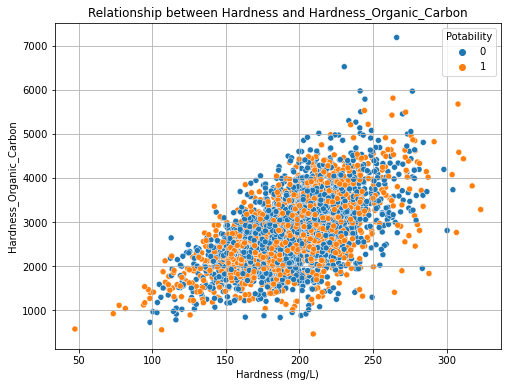

In [14]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hardness', y='Hardness_Organic_Carbon', hue='Potability', data=df)
plt.xlabel('Hardness (mg/L)')
plt.ylabel('Hardness_Organic_Carbon')
plt.title('Relationship between Hardness and Hardness_Organic_Carbon')
plt.grid(True)
plt.show()

In [15]:
#Creating interactive feature

# Interaction Feature 1: Hardness * Conductivity

df['Hardness_Conductivity'] = df ['Hardness'] * df['Conductivity']

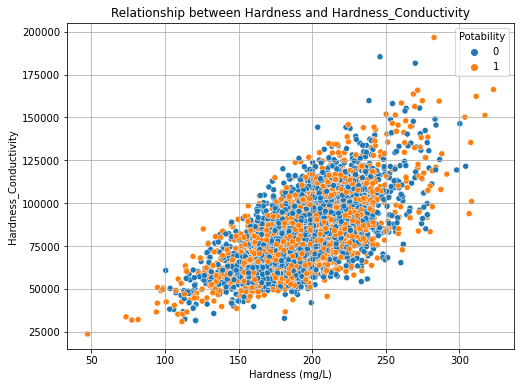

In [16]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hardness', y='Hardness_Conductivity', hue='Potability', data=df)
plt.xlabel('Hardness (mg/L)')
plt.ylabel('Hardness_Conductivity')
plt.title('Relationship between Hardness and Hardness_Conductivity')
plt.grid(True)
plt.show()

In [17]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        66.396293   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

      Hardness_Organic_Carbon  Hardness_Conductivity  
0                 2126.718483          115621.457180  
1                 1964.641631           76732.954710  
2                 3782.560046           93866.691376  
3                 3952.300331           77874.676028  
4                 2093.221851           72152.799599  
...                       ...                    ...  
3271              2691.095092          101958.747020  
3272              3852.333156           75959.876535  
3273              1940.256101           75937.334387  
3274              2575.600966           92906.359723  
3275              3149.022824           63888.151960  

[3276 rows x 12 columns]

In [18]:
#Creating interactive feature

# Interaction Feature 3: Hardness * Organic Carbon
df['Chloramines_Organic_carbon'] = df['Chloramines'] * df['Organic_carbon']

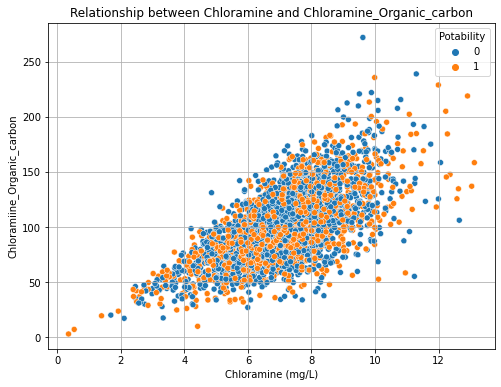

In [19]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Chloramines', y='Chloramines_Organic_carbon', hue='Potability', data=df)
plt.xlabel('Chloramine (mg/L)')
plt.ylabel('Chloramiine_Organic_carbon')
plt.title('Relationship between Chloramine and Chloramine_Organic_carbon')
plt.grid(True)
plt.show()

In [20]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        66.396293   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

      Hardness_Organic_Carbon  Hardness_Conductivity  \
0                 2126.718483          115621.457180   
1                 1964.641631           76732.954710   
2                 3782.560046           93866.691376   
3                 3952.300331           77874.676028   
4                 2093.221851           72152.799599   
...                       ...                    ...   
3271              2691.095092          101958.747020   
3272              3852.333156           75959.876535   
3273              1940.256101           75937.334387   
3274              2575.600966           92906.359723   
3275              3149.022824           63888.151960   

      Chloramines_Organic_carbon  
0                      75.774616  
1                     100.723120  
2                     156.471513  
3                     148.586079  
4                      75.667432  
...                          ...  
3271                   99.576281  
3272                  160.447103  
3273                   81.139737  
3274                   70.401850  
3275                  121.202957  

[3276 rows x 13 columns]

In [21]:
#Creating interactive feature

# Interaction Feature 3: Hardness * Organic Carbon
df['Sulfate_Hardness'] = df['Sulfate'] * df['Hardness']

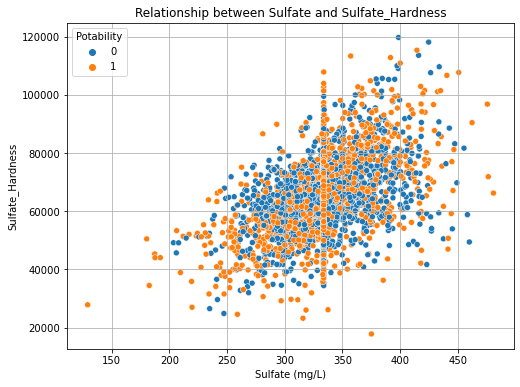

In [22]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sulfate', y='Sulfate_Hardness', hue='Potability', data=df)
plt.xlabel('Sulfate (mg/L)')
plt.ylabel('Sulfate_Hardness')
plt.title('Relationship between Sulfate and Sulfate_Hardness')
plt.grid(True)
plt.show()

In [23]:
#Creating interactive feature

# Interaction Feature 5: Hardness * Organic Carbon
df['Turbidity_Solids'] = df['Turbidity'] * df['Solids']

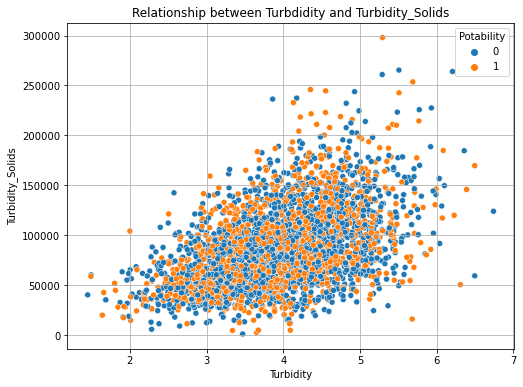

In [24]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Turbidity', y='Turbidity_Solids', hue='Potability', data=df)
plt.xlabel('Turbidity')
plt.ylabel('Turbidity_Solids')
plt.title('Relationship between Turbdidity and Turbidity_Solids')
plt.grid(True)
plt.show()

In [25]:
#Creating interactive feature

# Interaction Feature 5: Hardness * Organic Carbon
df['Sulfate_Conductivity'] = df['Sulfate'] * df['Conductivity']

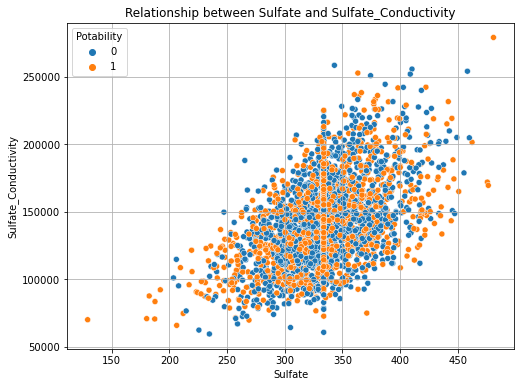

In [26]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sulfate', y='Sulfate_Conductivity', hue='Potability', data=df)
plt.xlabel('Sulfate')
plt.ylabel('Sulfate_Conductivity')
plt.title('Relationship between Sulfate and Sulfate_Conductivity')
plt.grid(True)
plt.show()

In [27]:
#Creating interactive feature

# Interaction Feature 1: Hardness * Organic Carbon
df['ph_Hardness'] = df['ph'] * df['Hardness']


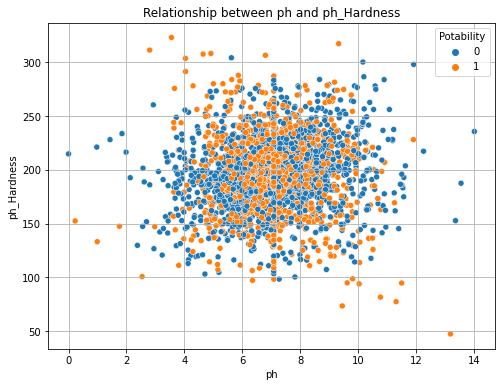

In [28]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ph', y='Hardness', hue='Potability', data=df)
plt.xlabel('ph')
plt.ylabel('ph_Hardness')
plt.title('Relationship between ph and ph_Hardness')
plt.grid(True)
plt.show()

In [29]:
#Creating interactive feature

# Interaction Feature 1: Hardness * Organic Carbon
df['ph_Conductivity'] = df['ph'] * df['Conductivity']


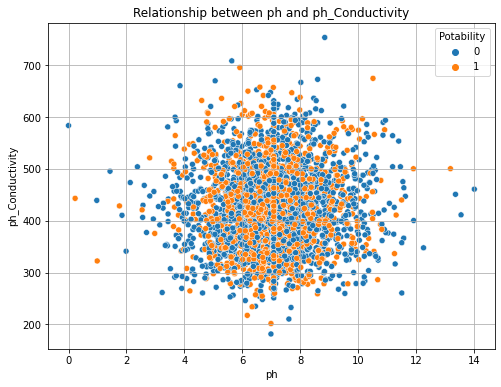

In [30]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ph', y='Conductivity', hue='Potability', data=df)
plt.xlabel('ph')
plt.ylabel('ph_Conductivity')
plt.title('Relationship between ph and ph_Conductivity')
plt.grid(True)
plt.show()

In [31]:
#Creating interactive feature

# Interaction Feature 1: Solid * Conductivity
df['Solids_Conductivity'] = df['Solids'] * df['Conductivity']

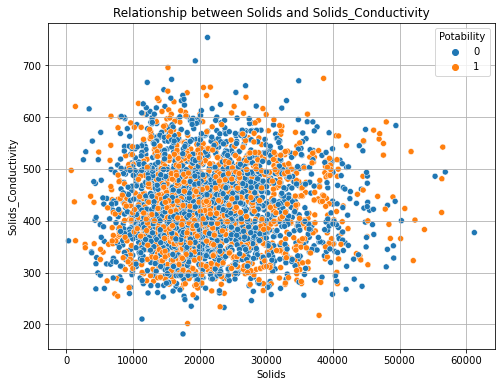

In [32]:
# Scatter plot with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solids', y='Conductivity', hue='Potability', data=df)
plt.xlabel('Solids')
plt.ylabel('Solids_Conductivity')
plt.title('Relationship between Solids and Solids_Conductivity')
plt.grid(True)
plt.show()

### Creating Ratio Features

* Hardness-to-Solids Ratio:
High values indicate that a large proportion of the total solids are contributing to water hardness.

* Chloramines-to-Trihalomethanes Ratio:
Higher ratios might suggest effective disinfection with fewer byproducts.

* Sulfate-to-Solids Ratio:
Indicates the proportion of sulfate in the total dissolved solids.

* Organic Carbon-to-Solids Ratio:
Provides insight into how much of the total solids are organic in nature.

* Conductivity-to-Solids Ratio:
Reflects the relationship between ionic content and total solids.

* Trihalomethanes-to-Organic Carbon Ratio:
Highlights the efficiency of THM formation in relation to available organic matter.

* Turbidity-to-Solids Ratio:
Indicates how much suspended solids contribute to turbidity.

* Chloramines-to-Sulfate Ratio:
Balances chemical disinfectants with sulfate ions.

* Hardness-to-Conductivity Ratio:
Shows the proportion of hardness-contributing ions to total ionic content.

* Sulfate-to-Conductivity Ratio:
Indicates the contribution of sulfate to overall conductivity.


In [33]:
#Creating ration features
df['Hardness_Solids_Ratio'] = df['Hardness'] / df['Solids']
df['Chloramines_Trihalomethanes_Ratio'] = df['Chloramines'] / df['Trihalomethanes']
df['Sulfate_Solids_Ratio'] = df['Sulfate'] / df['Solids']
df['OrganicCarbon_Solids_Ratio'] = df['Organic_carbon'] / df['Solids']
df['Conductivity_Solids_Ratio'] = df['Conductivity'] / df['Solids']
df['Trihalomethanes_OrganicCarbon_Ratio'] = df['Trihalomethanes'] / df['Organic_carbon']
df['Turbidity_Solids_Ratio'] = df['Turbidity'] / df['Solids']
df['Chloramines_Sulfate_Ratio'] = df['Chloramines'] / df['Sulfate']
df['Hardness_Conductivity_Ratio'] = df['Hardness'] / df['Conductivity']
df['Sulfate_Conductivity_Ratio'] = df['Sulfate'] / df['Conductivity']

# Display the updated DataFrame
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135           0   
1       592.885359       15.180013        56.329076   4.500656           0   
2       418.606213       16.868637        66.420093   3.055934           0   
3       363.266516       18.436524       100.341674   4.628771           0   
4       398.410813       11.558279        31.997993   4.075075           0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821           1   
3272    392.449580       19.903225        66.396293   2.798243           1   
3273    432.044783       11.039070        69.845400   3.298875           1   
3274    402.883113       11.168946        77.488213   4.708658           1   
3275    327.459760       16.140368        78.698446   2.309149           1   

      ...  Hardness_Solids_Ratio  Chloramines_Trihalomethanes_Ratio  \
0     ...               0.009855                           0.083919   
1     ...               0.006947                           0.117794   
2     ...               0.011263                           0.139655   
3     ...               0.009736                           0.080319   
4     ...               0.010073                           0.204594   
...   ...                    ...                                ...   
3271  ...               0.004071                           0.107466   
3272  ...               0.011169                           0.121413   
3273  ...               0.005301                           0.105236   
3274  ...               0.019243                           0.081346   
3275  ...               0.011210                           0.095419   

      Sulfate_Solids_Ratio  OrganicCarbon_Solids_Ratio  \
0                 0.017725                    0.000499   
1                 0.017916                    0.000815   
2                 0.016765                    0.000847   
3                 0.016209                    0.000837   
4                 0.017250                    0.000643   
...                    ...                         ...   
3271              0.007565                    0.000292   
3272              0.019260                    0.001148   
3273              0.010067                    0.000333   
3274              0.027852                    0.000932   
3275              0.019178                    0.000927   

      Conductivity_Solids_Ratio  Trihalomethanes_OrganicCarbon_Ratio  \
0                      0.027142                             8.380808   
1                      0.031824                             3.710740   
2                      0.021025                             3.937490   
3                      0.016498                             5.442548   
4                      0.022160                             2.768404   
...                         ...                                  ...   
3271                   0.011064                             4.799603   
3272                   0.022646                             3.335956   
3273                   0.013031                 

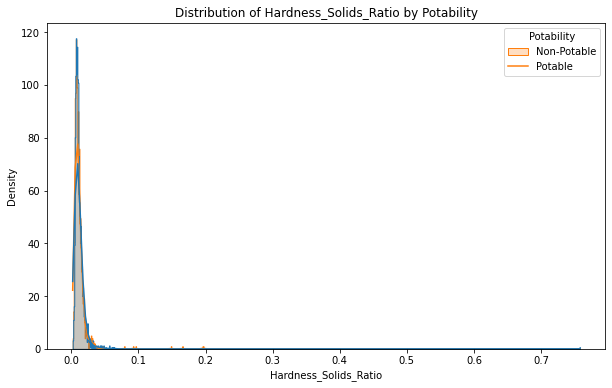

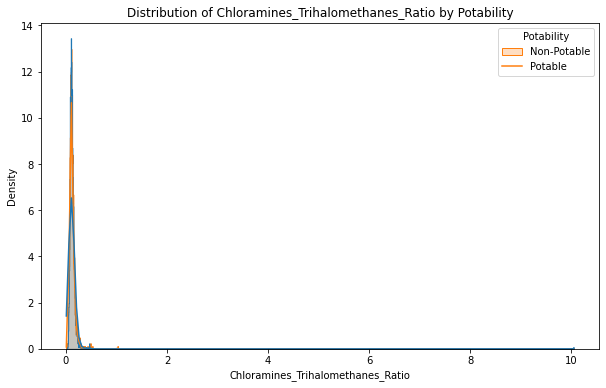

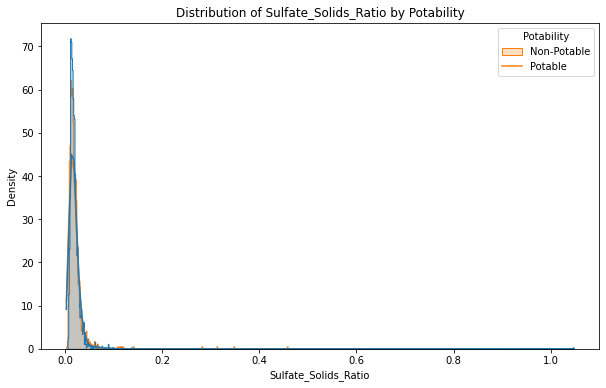

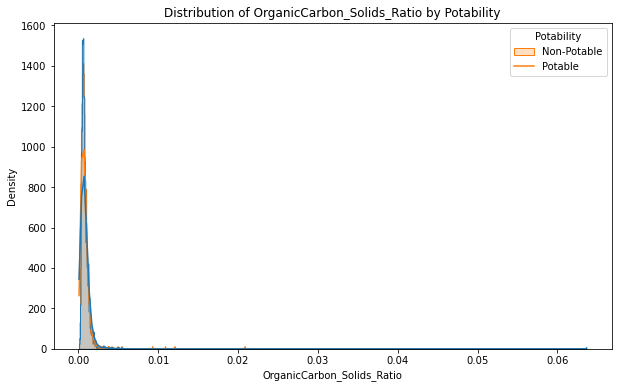

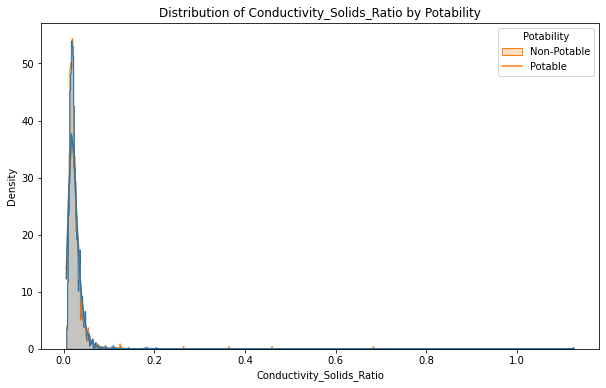

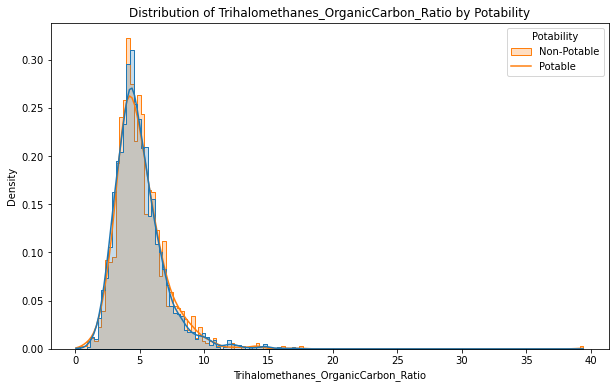

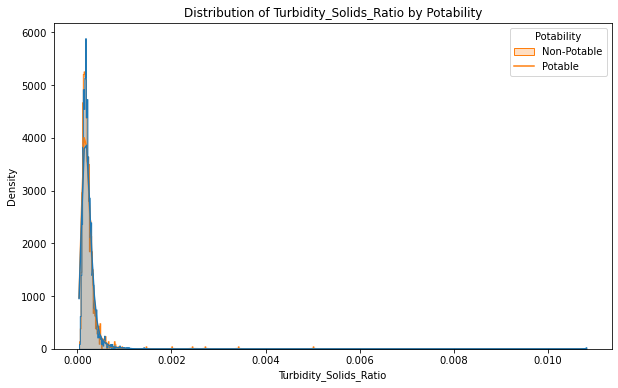

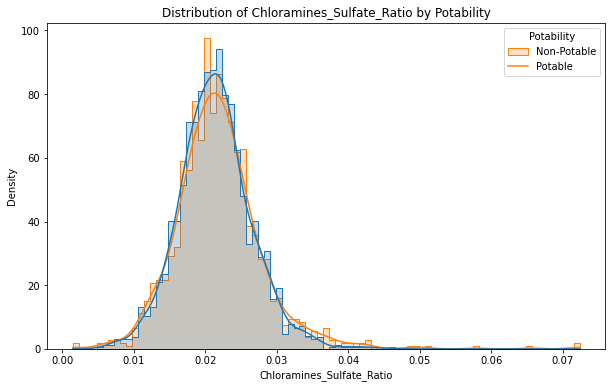

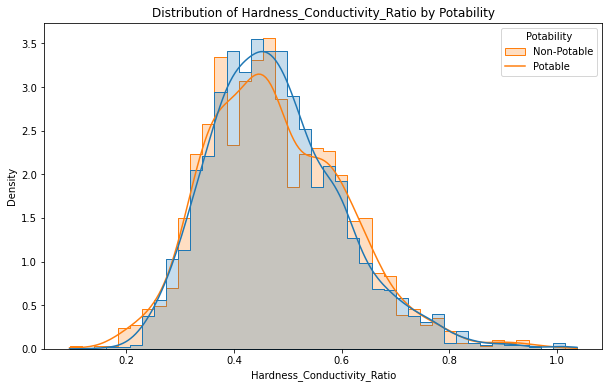

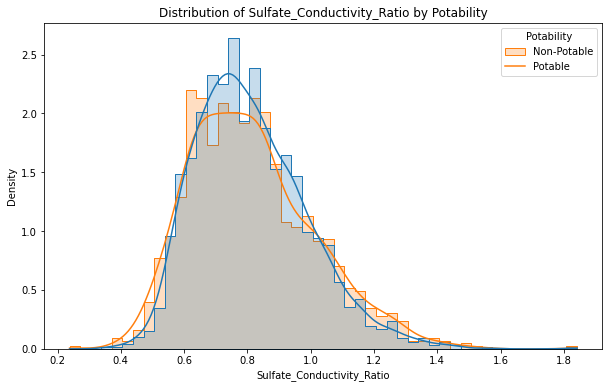

In [34]:
# List of ratio features
ratio_features = [
    'Hardness_Solids_Ratio', 'Chloramines_Trihalomethanes_Ratio', 'Sulfate_Solids_Ratio',
    'OrganicCarbon_Solids_Ratio', 'Conductivity_Solids_Ratio', 'Trihalomethanes_OrganicCarbon_Ratio',
    'Turbidity_Solids_Ratio', 'Chloramines_Sulfate_Ratio', 'Hardness_Conductivity_Ratio', 'Sulfate_Conductivity_Ratio'
]

for ratio in ratio_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=ratio, hue='Potability', kde=True, element='step', stat="density", common_norm=False)
    plt.title(f'Distribution of {ratio} by Potability')
    plt.xlabel(ratio)
    plt.ylabel('Density')
    plt.legend(title='Potability', labels=['Non-Potable', 'Potable'])
    plt.show()


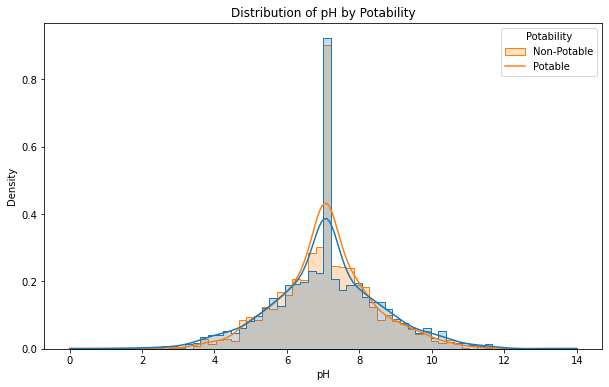

In [35]:
#plotting for ph

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ph', hue='Potability', kde=True, element='step', stat="density", common_norm=False)
plt.title('Distribution of pH by Potability')
plt.xlabel('pH')
plt.ylabel('Density')
plt.legend(title='Potability', labels=['Non-Potable', 'Potable'])
plt.show()


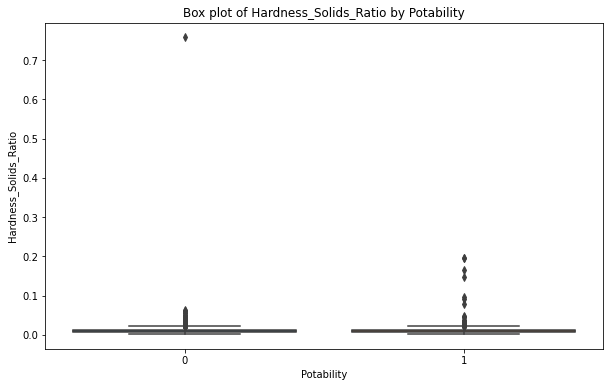

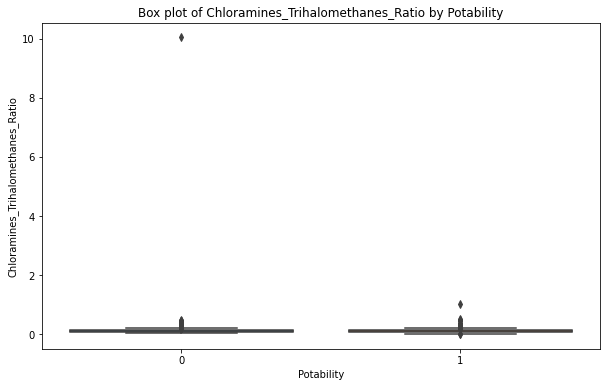

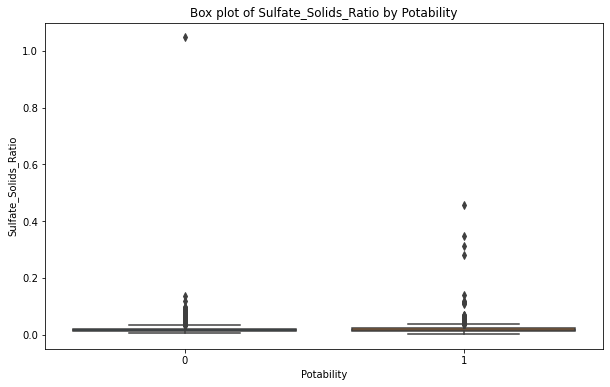

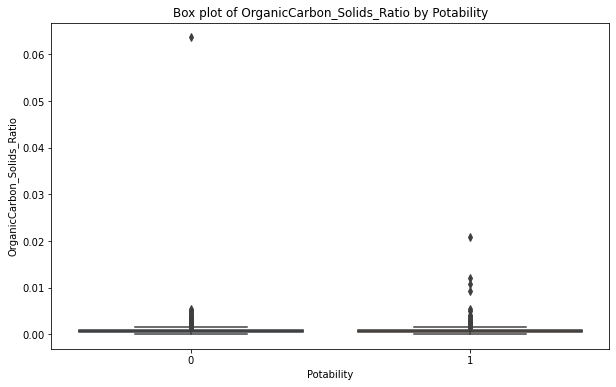

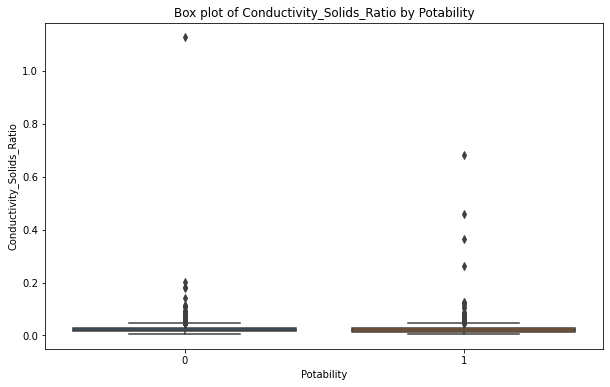

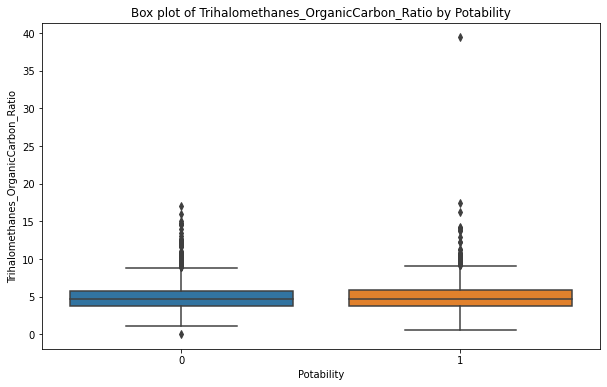

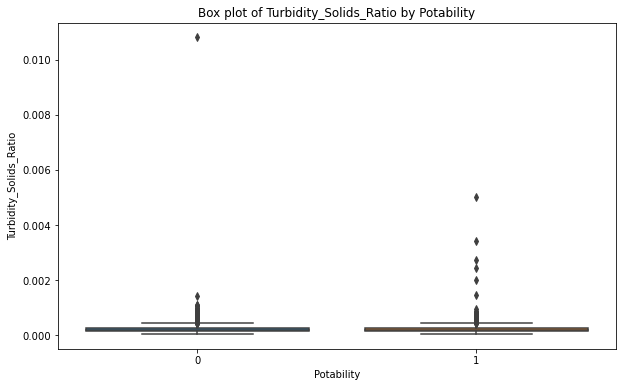

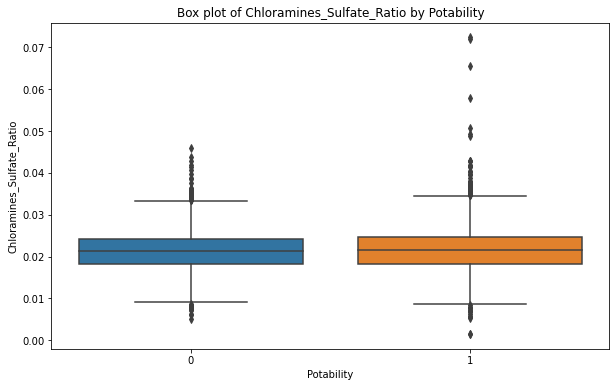

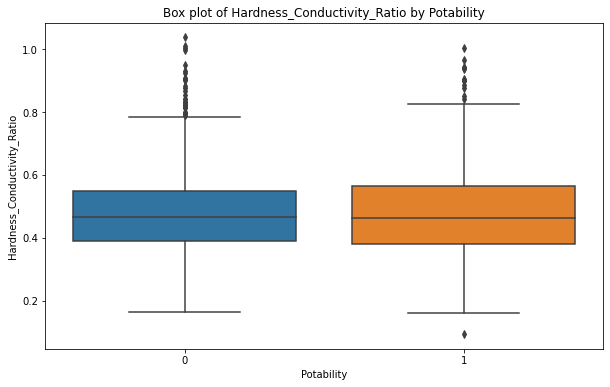

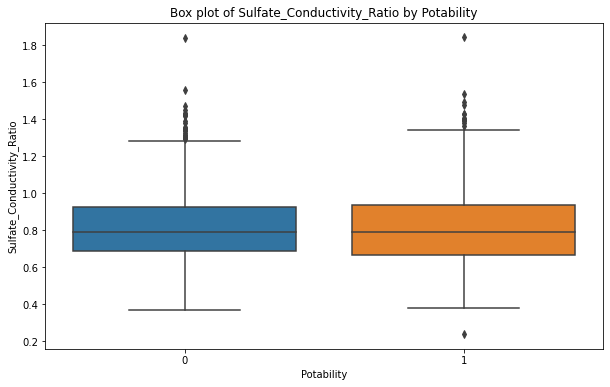

In [36]:
#Box Plot for ratios

for ratio in ratio_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Potability', y=ratio)
    plt.title(f'Box plot of {ratio} by Potability')
    plt.xlabel('Potability')
    plt.ylabel(ratio)
    plt.show()

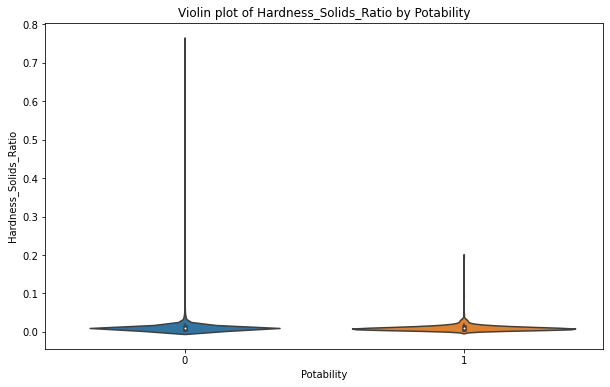

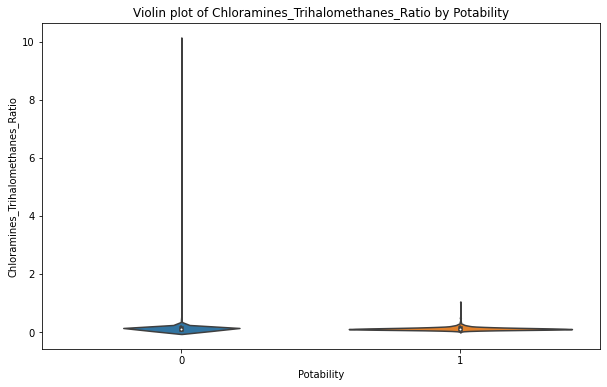

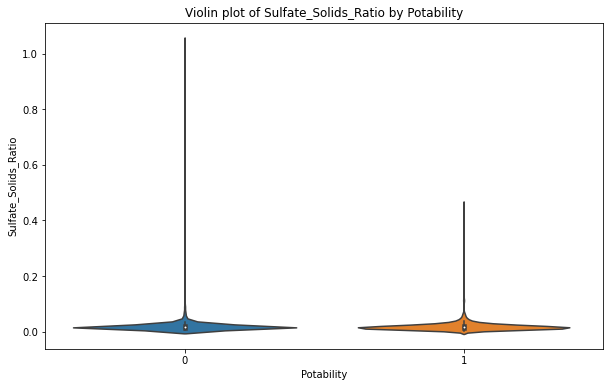

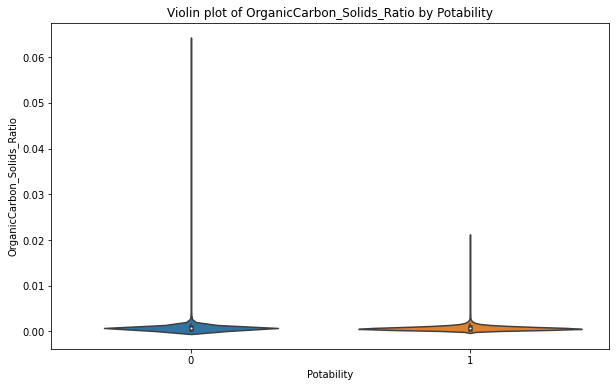

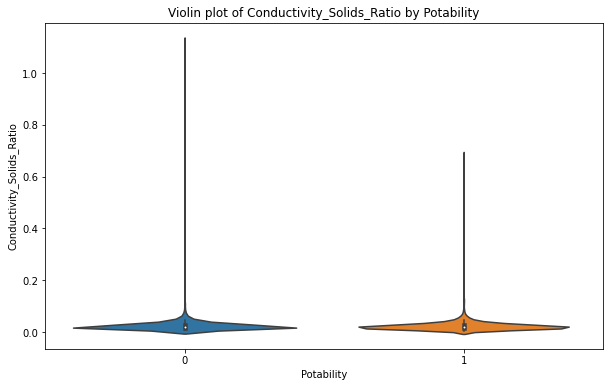

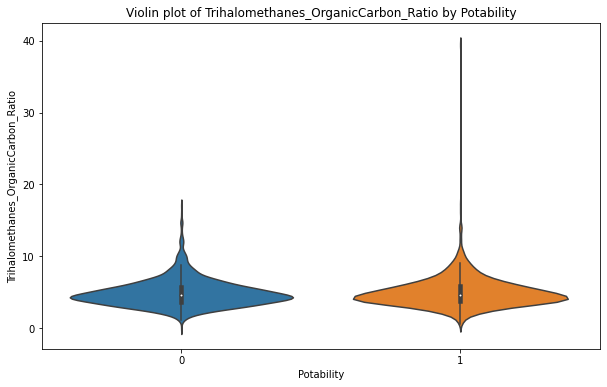

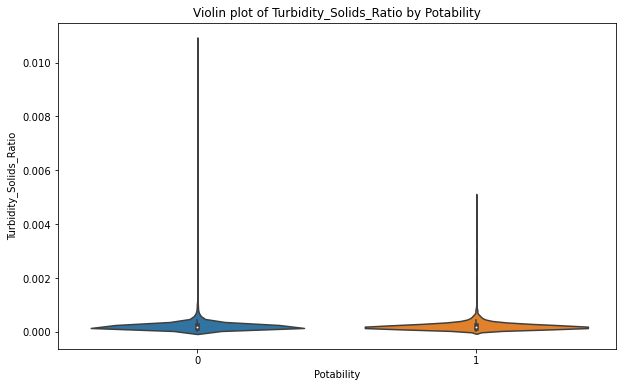

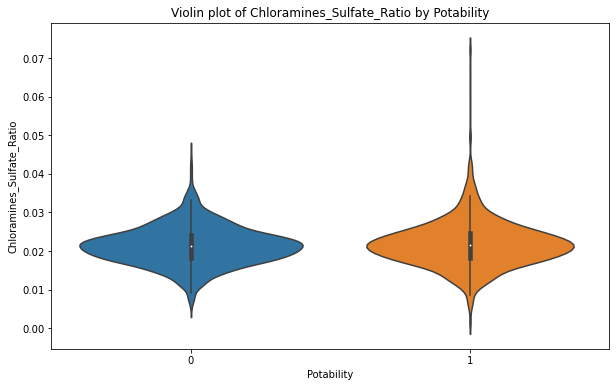

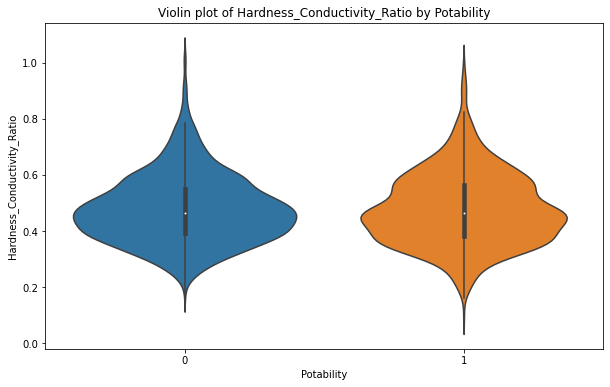

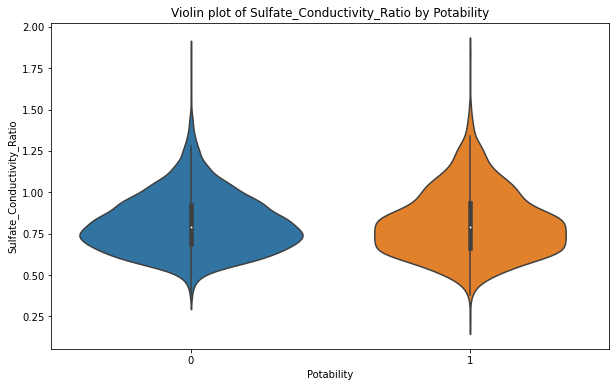

In [37]:
#Violine plot
for ratio in ratio_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='Potability', y=ratio)
    plt.title(f'Violin plot of {ratio} by Potability')
    plt.xlabel('Potability')
    plt.ylabel(ratio)
    plt.show()

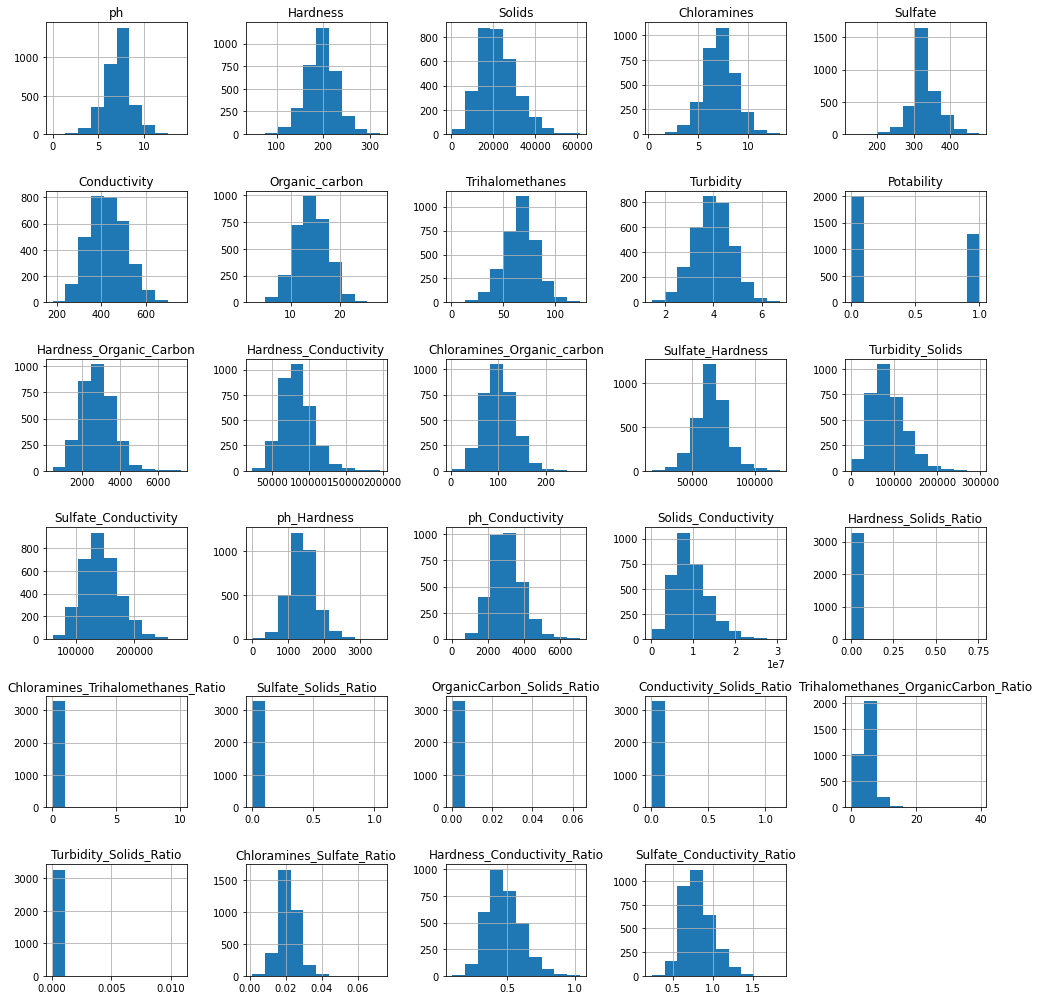

In [38]:

# Visualize for histogram
df.hist(figsize=(14,14))
plt.tight_layout();

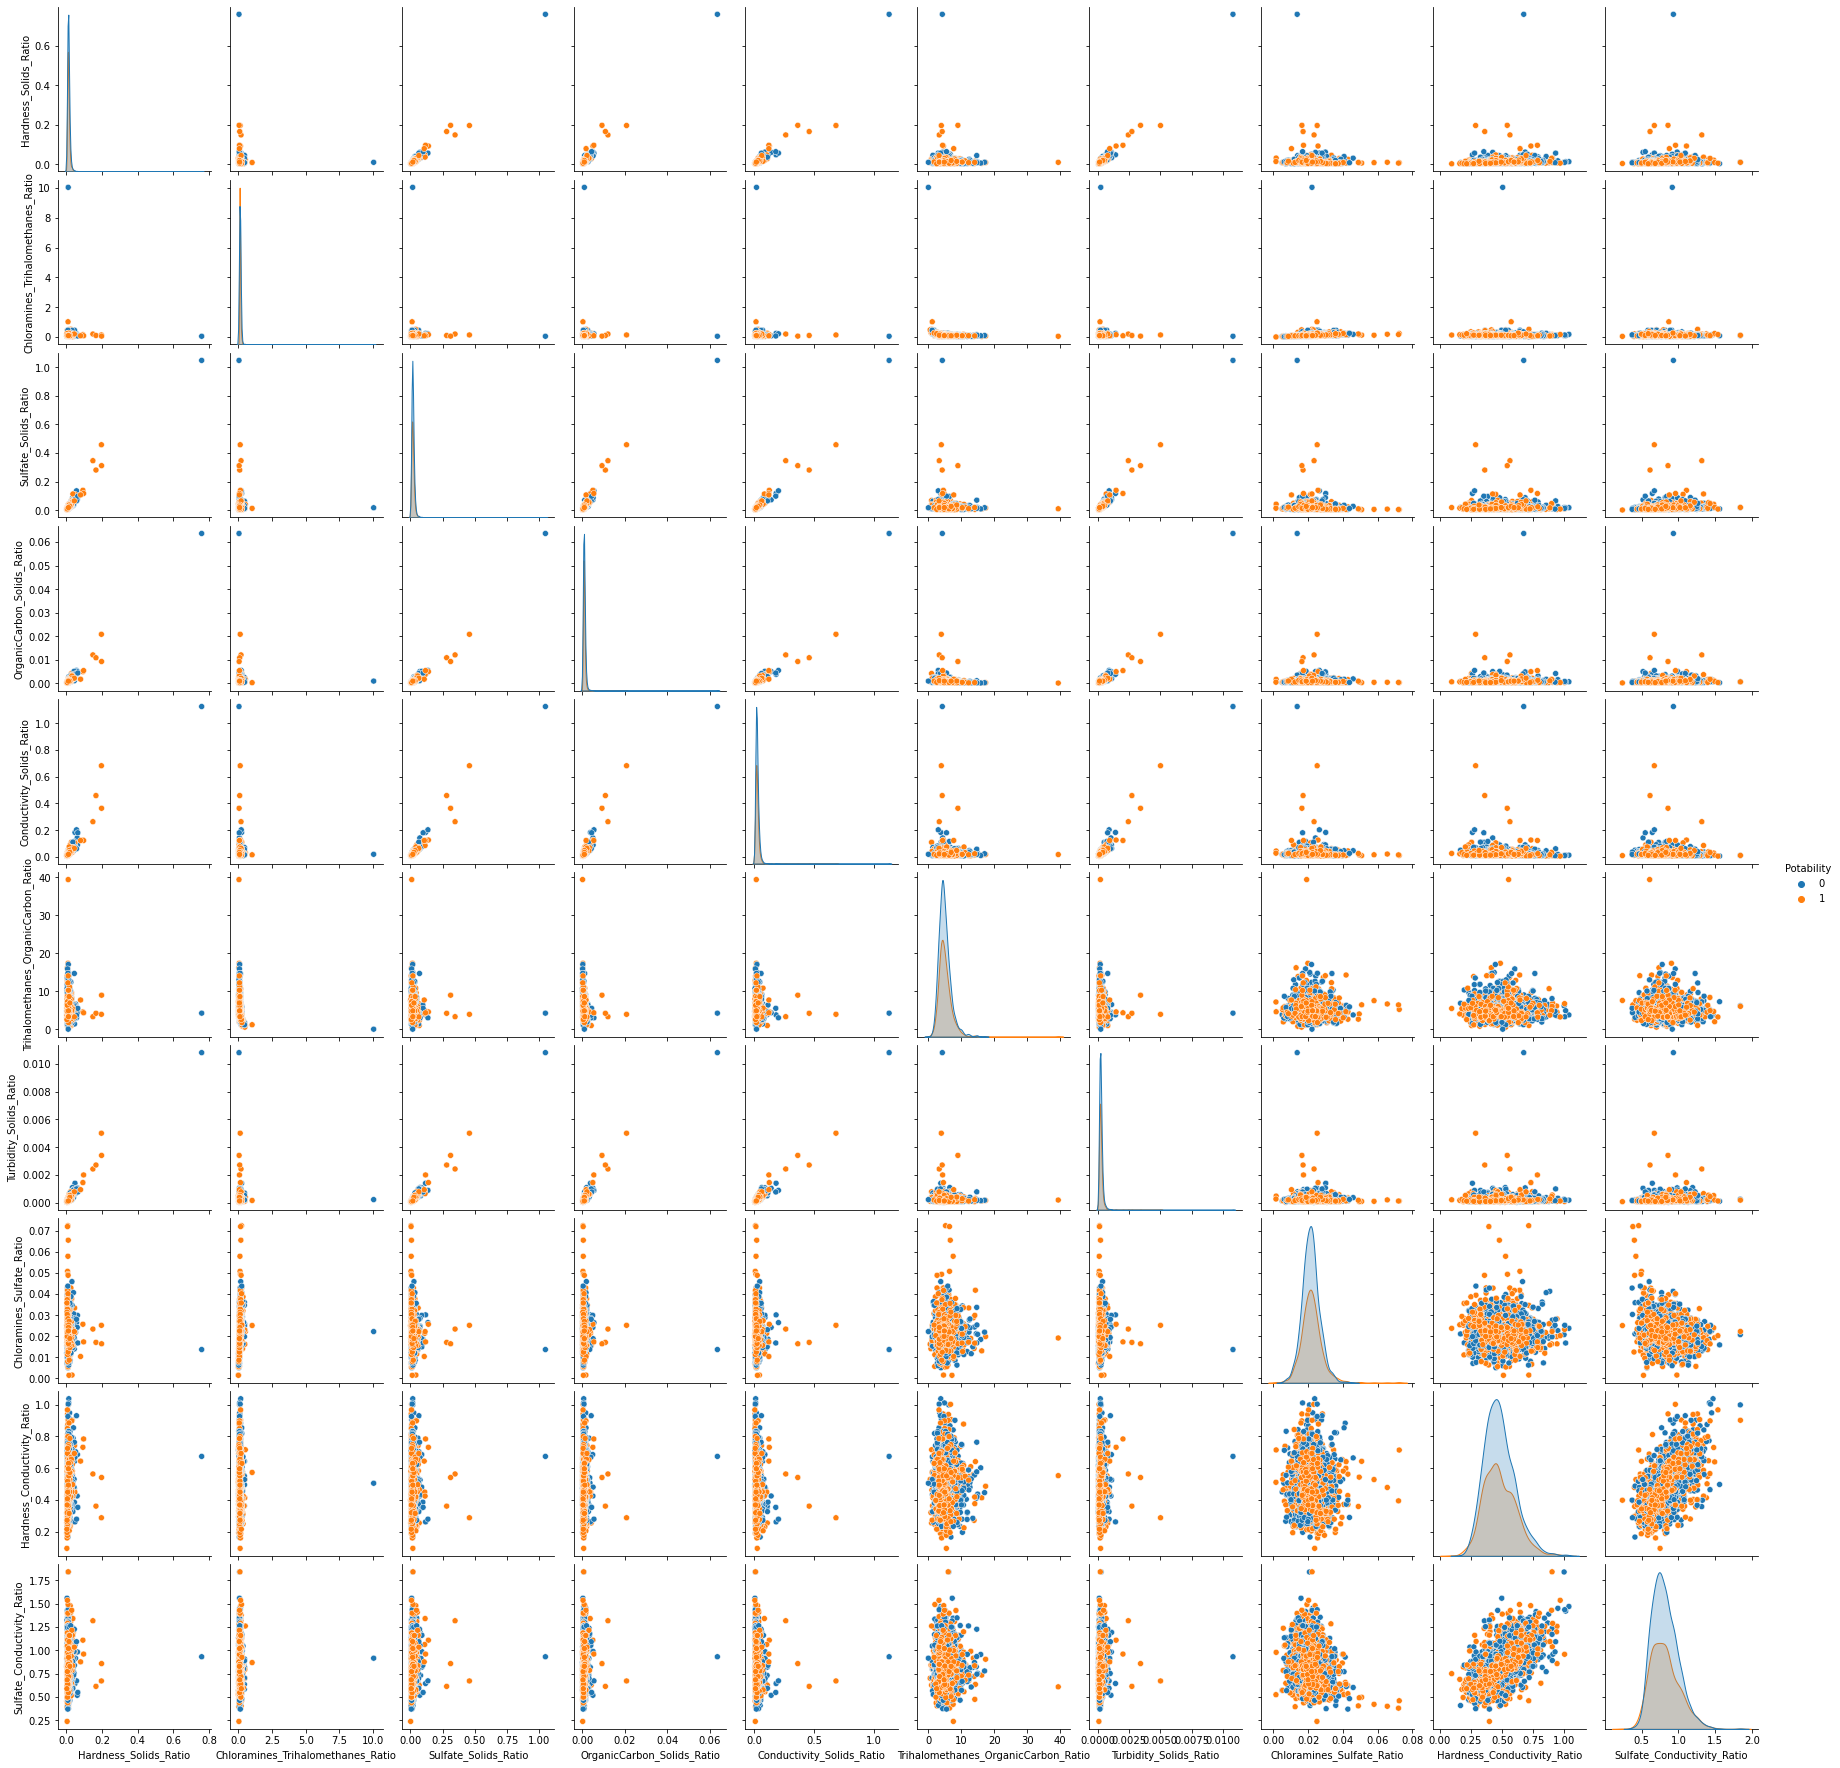

In [39]:
#Visualize for pairplot
#sns.pairplot(df, vars=ratio_features, hue='Potability')
#plt.show()

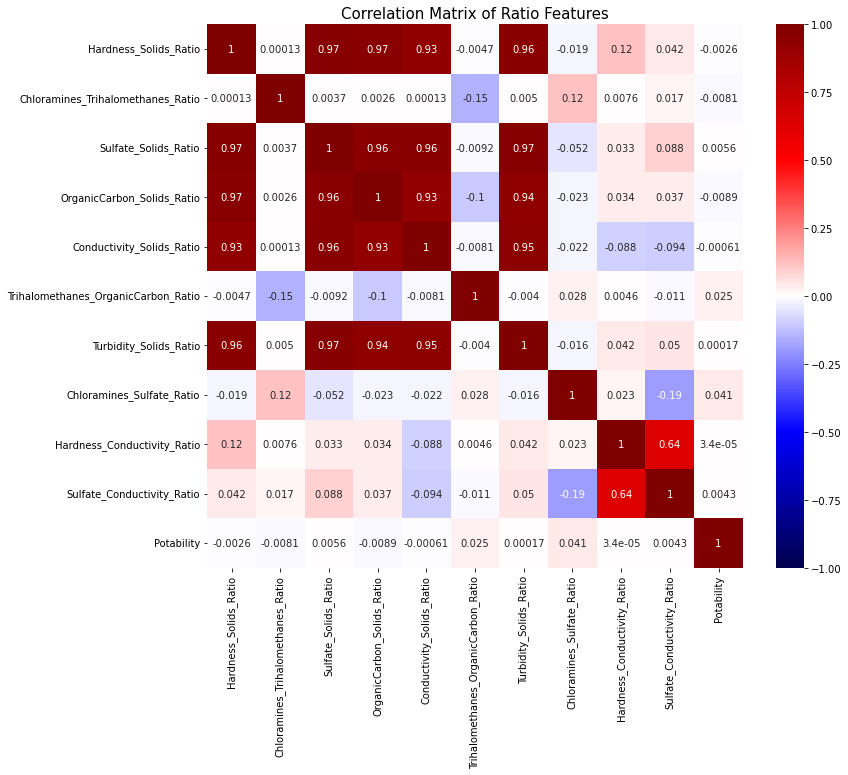

In [40]:
#Visualize for heatMap

plt.figure(figsize=(12, 10))
corr_matrix = df[ratio_features + ['Potability']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Ratio Features', fontsize=15)
plt.show()

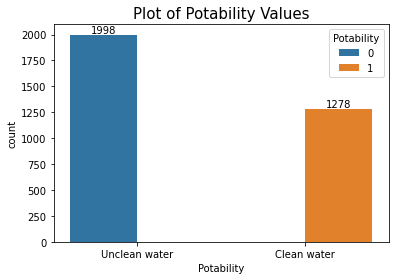

In [41]:
ax = sns.countplot(x='Potability', data=df, hue='Potability')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Plot of Potability Values', fontsize=15)
plt.xticks([0,1], ['Unclean water', 'Clean water']);

In [42]:
#standardizing ratio features for Principal component analysis

scaler = StandardScaler()
scaled_ratios = scaler.fit_transform(df[ratio_features])

In [43]:
# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_ratios)

In [44]:
# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Potability'] = df['Potability']

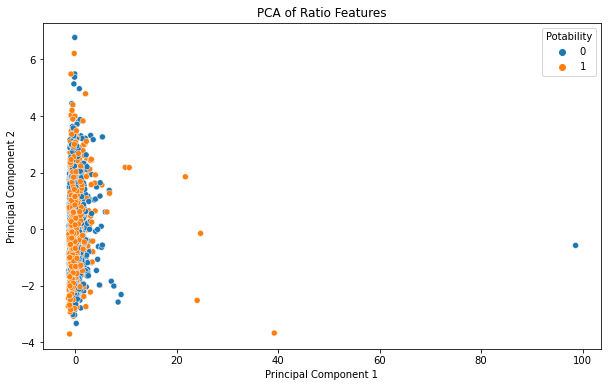

In [45]:
# Plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Potability')
plt.title('PCA of Ratio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

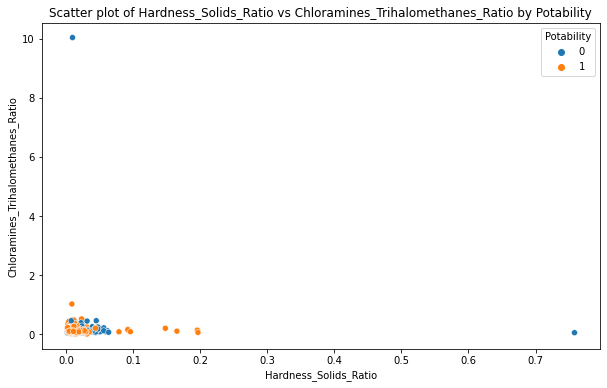

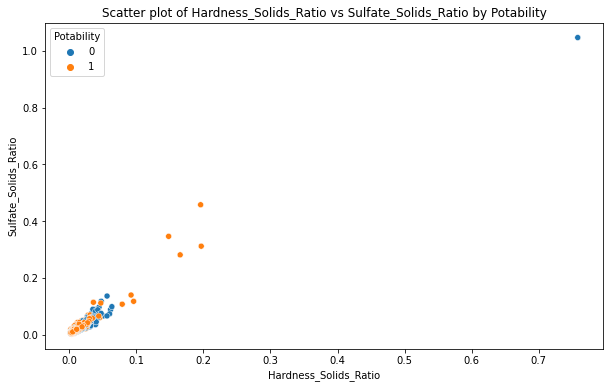

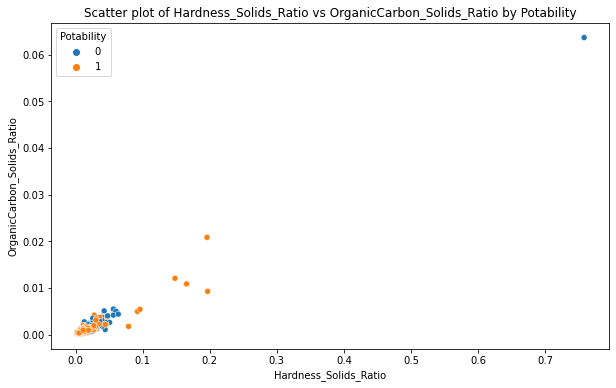

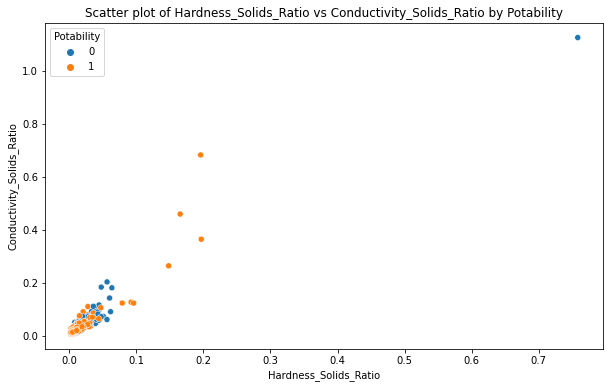

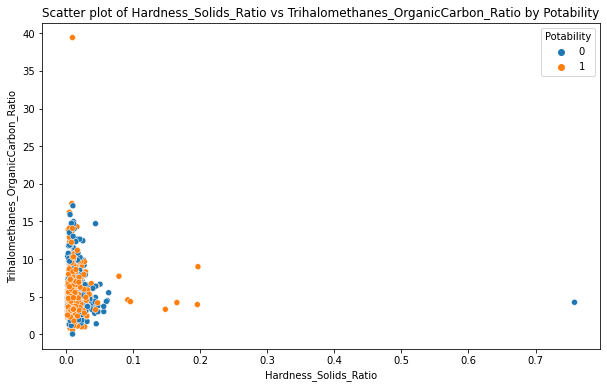

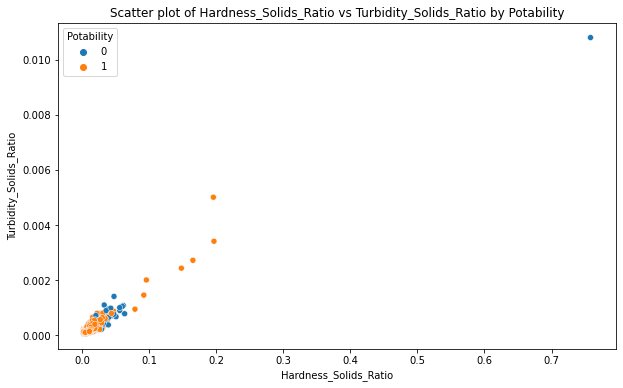

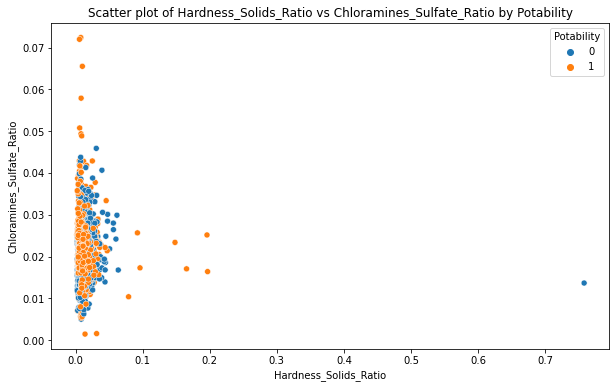

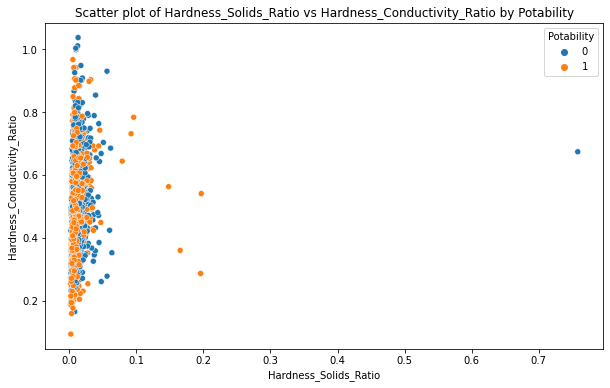

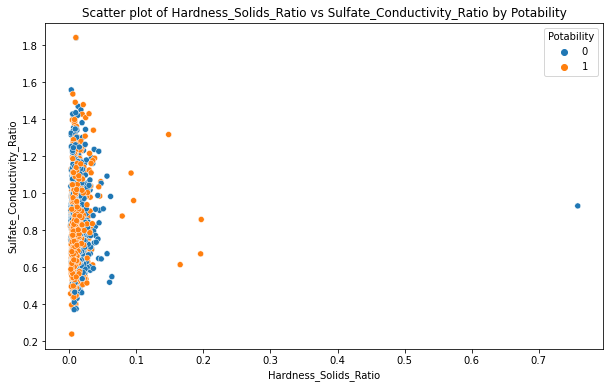

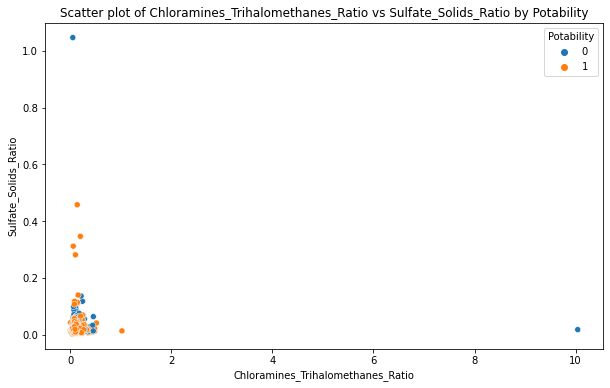

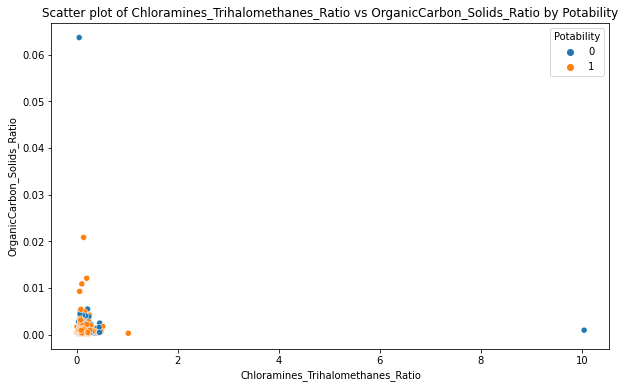

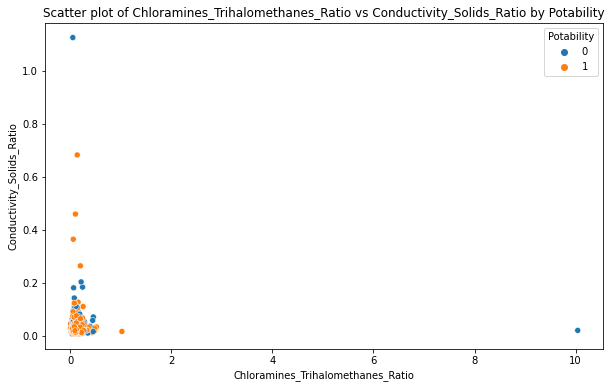

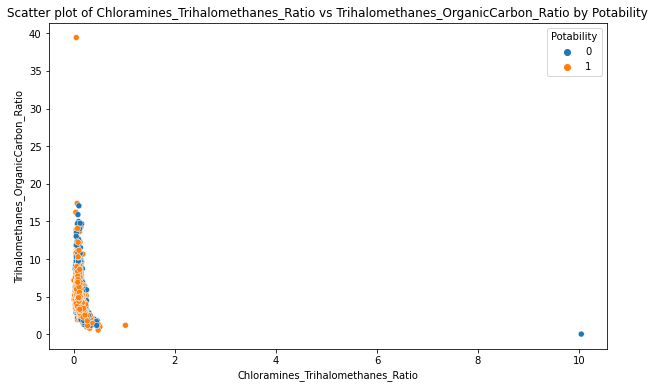

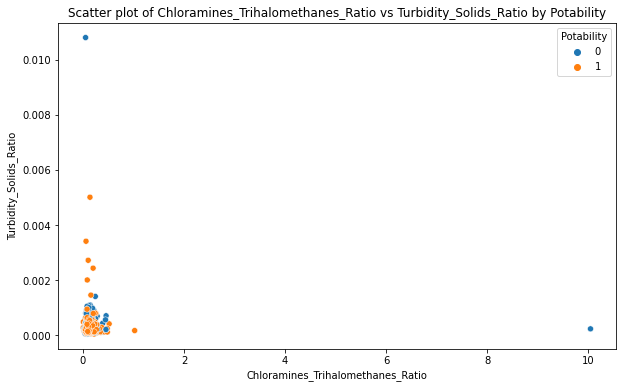

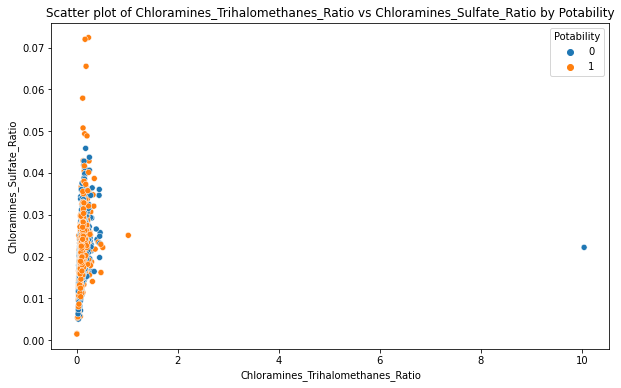

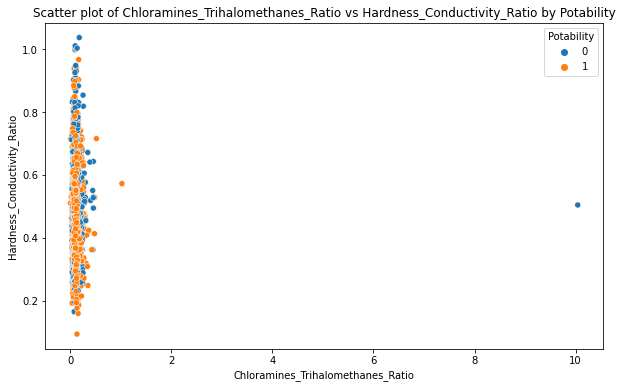

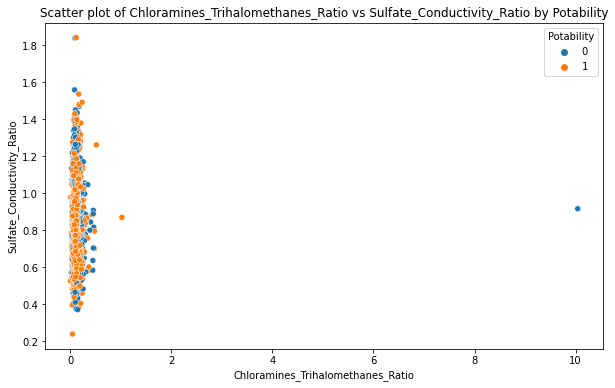

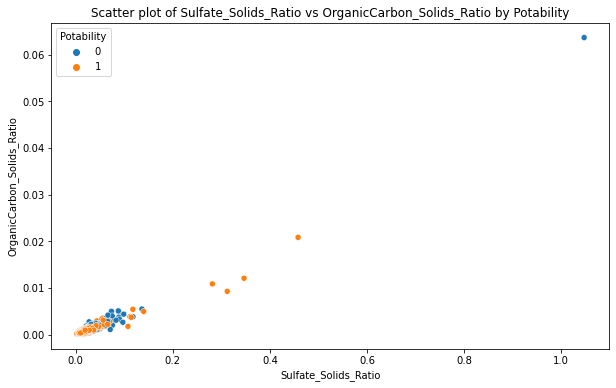

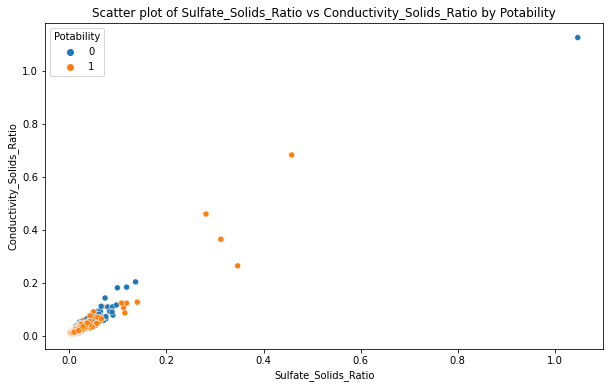

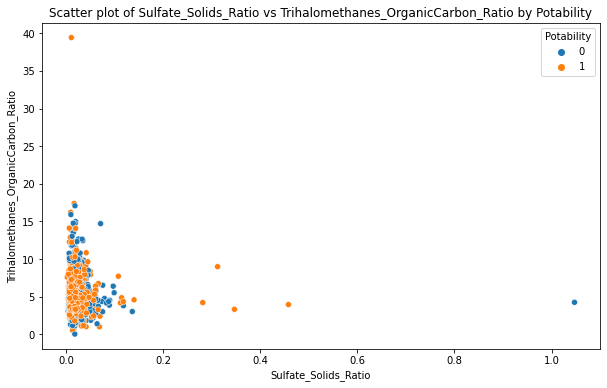

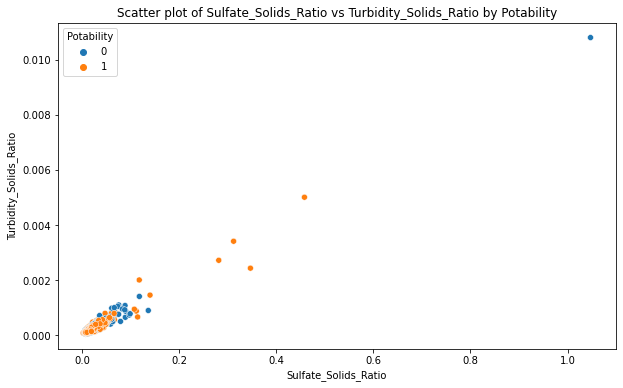

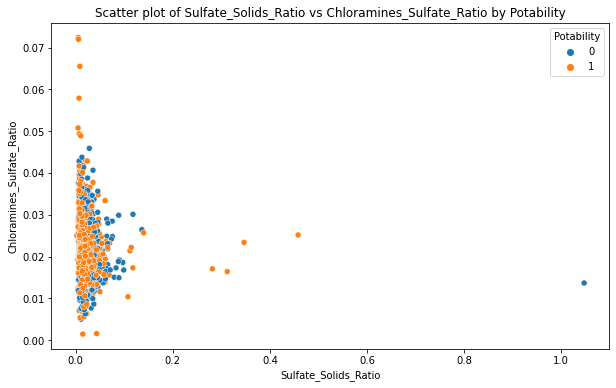

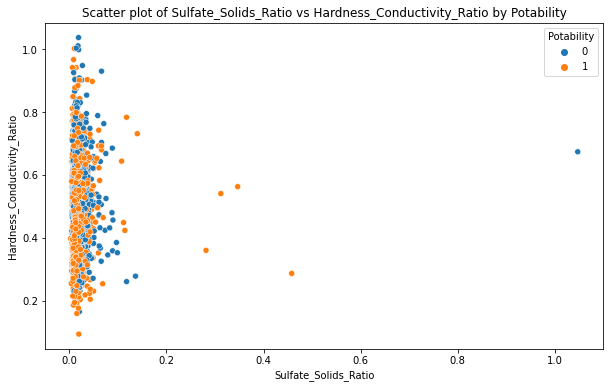

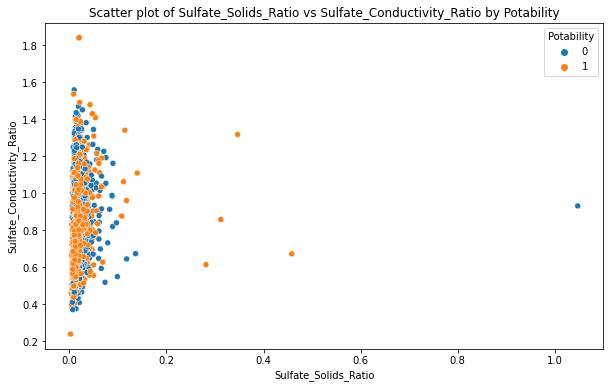

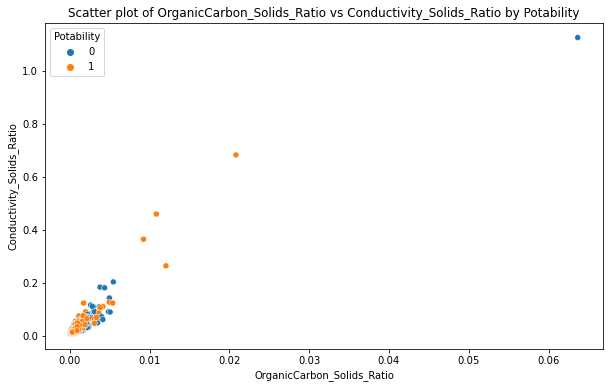

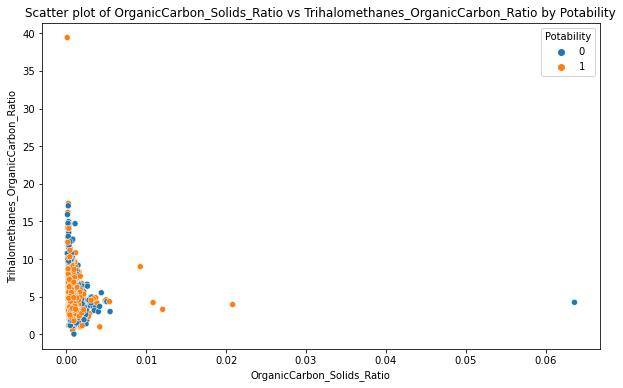

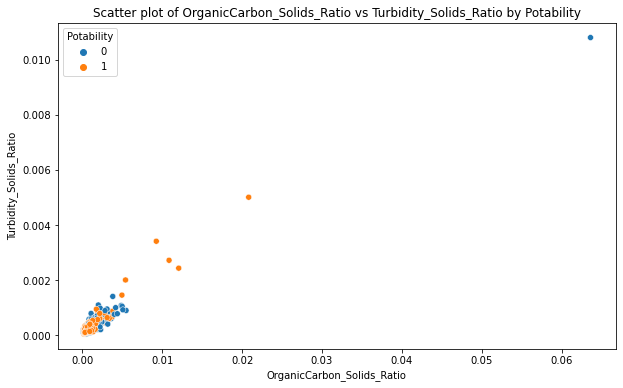

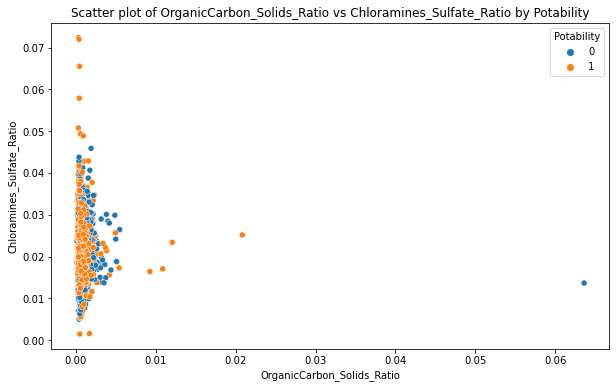

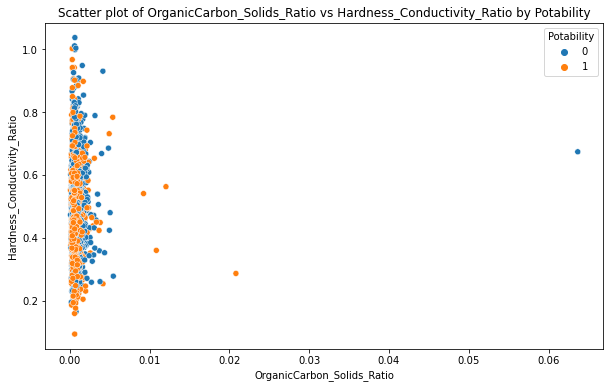

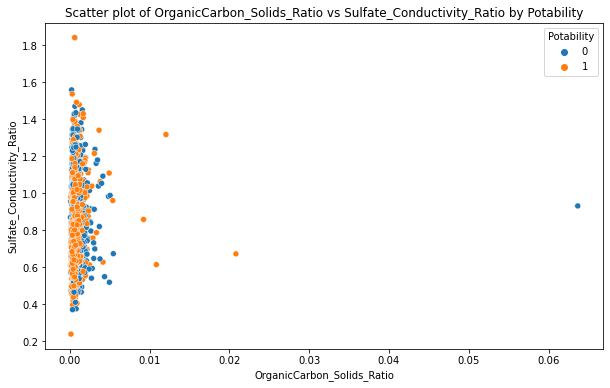

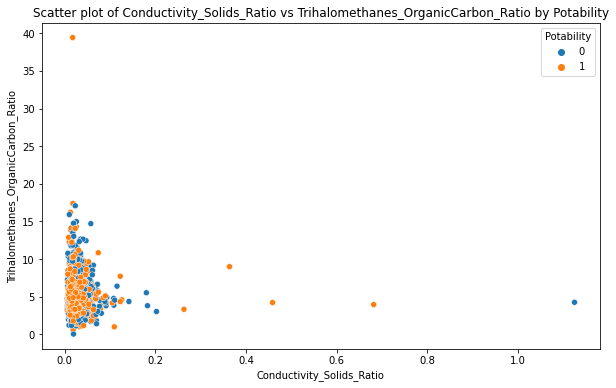

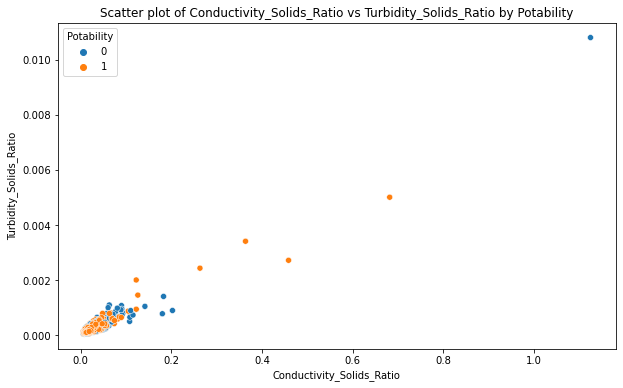

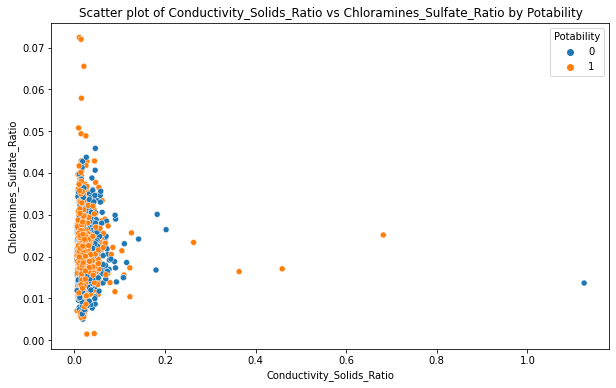

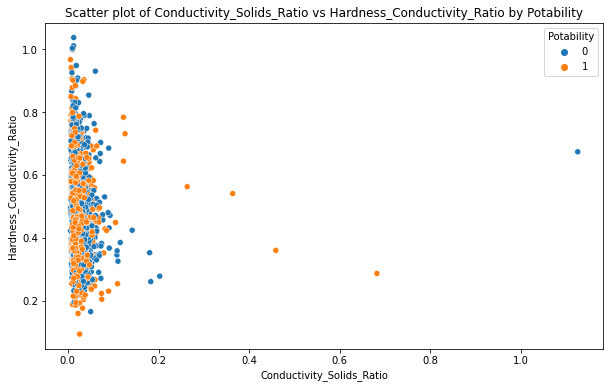

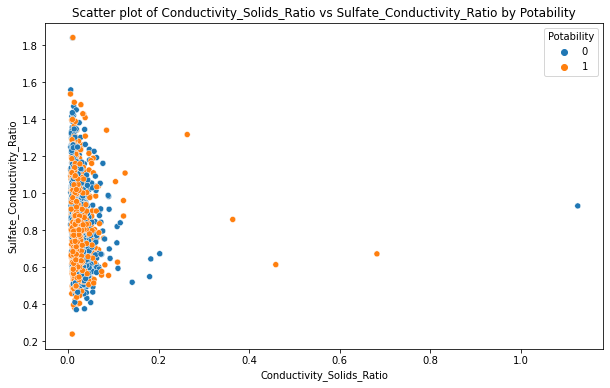

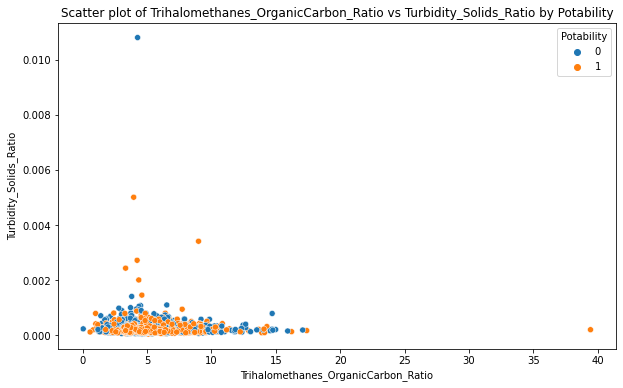

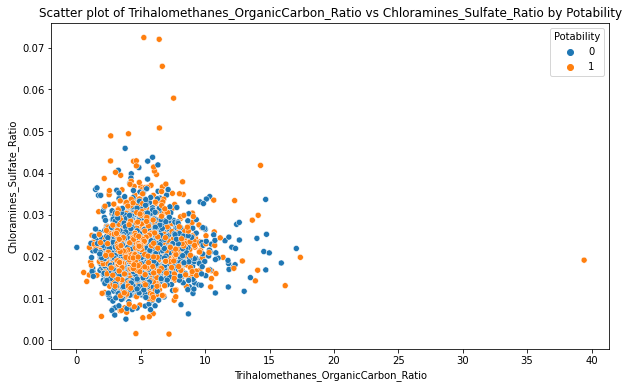

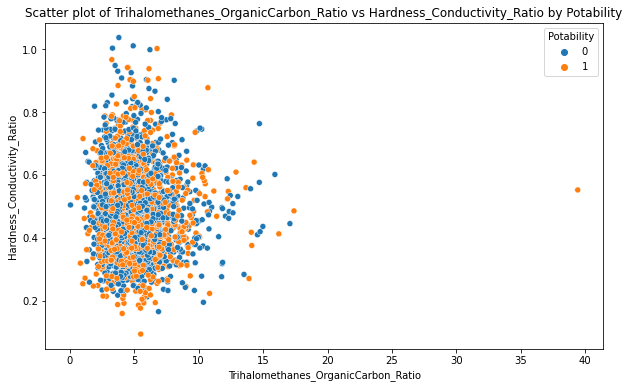

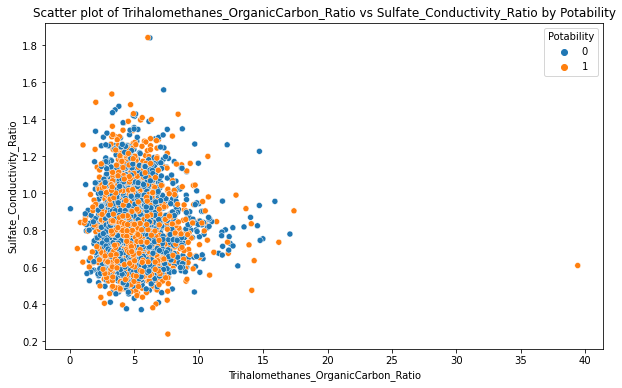

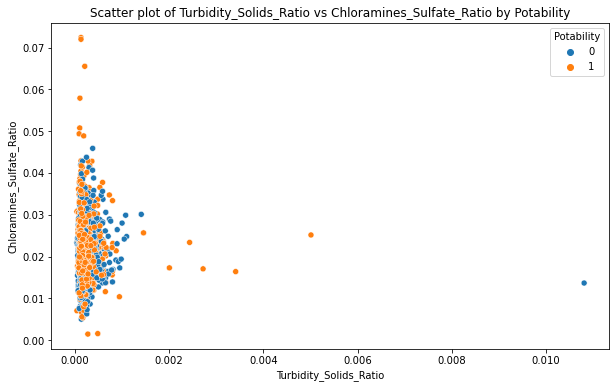

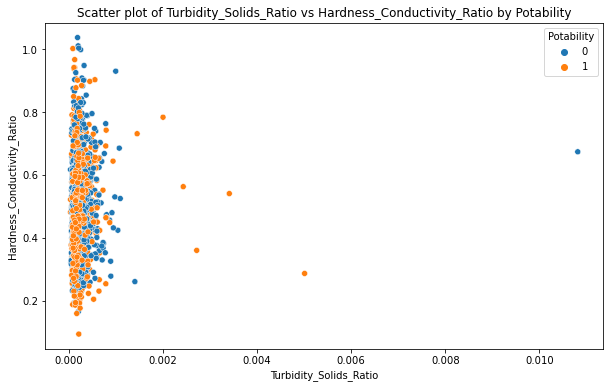

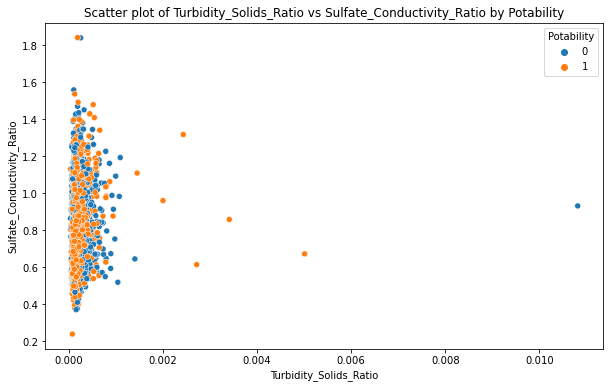

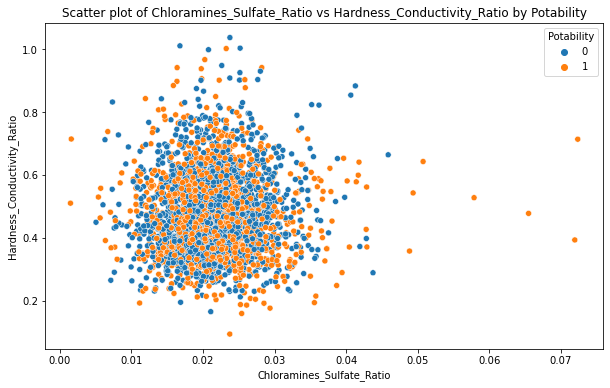

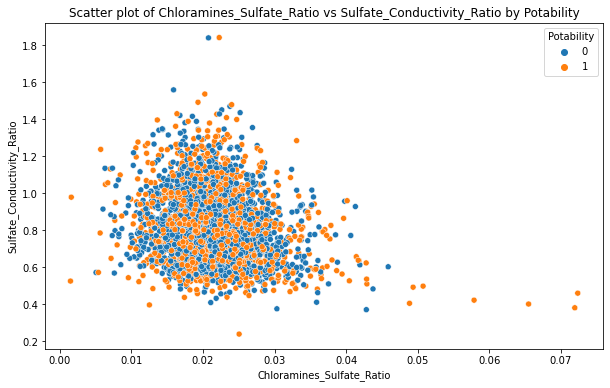

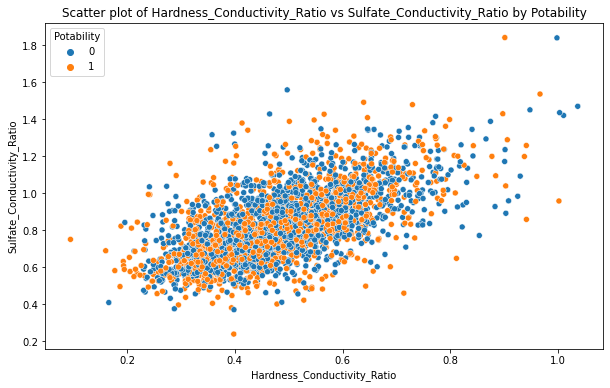

In [46]:
#Scatter plot for visualization

for i in range(len(ratio_features)):
    for j in range(i + 1, len(ratio_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=ratio_features[i], y=ratio_features[j], hue='Potability')
        plt.title(f'Scatter plot of {ratio_features[i]} vs {ratio_features[j]} by Potability')
        plt.xlabel(ratio_features[i])
        plt.ylabel(ratio_features[j])
        plt.show()

In [47]:
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Hardness_Solids_Ratio  Chloramines_Trihalomethanes_Ratio  \
0               0.009855                           0.083919   
1               0.006947                           0.117794   
2               0.011263                           0.139655   
3               0.009736                           0.080319   
4               0.010073                           0.204594   

   Sulfate_Solids_Ratio  OrganicCarbon_Solids_Ratio  \
0              0.017725                    0.000499   
1              0.017916                    0.000815   
2              0.016765                    0.000847   
3              0.016209                    0.000837   
4              0.017250                    0.000643   

   Conductivity_Solids_Ratio  Trihalomethanes_OrganicCarbon_Ratio  \
0                   0.027142                             8.380808   
1                   0.031824                             3.710740   
2                   0.021025                             3.937490   
3                   0.016498                             5.442548   
4                   0.022160                             2.768404   

   Turbidity_Solids_Ratio  Chloramines_Sulfate_Ratio  \
0                0.000143                   0.019810   
1                0.000242                   0.019879   
2                0.000153                   0.027791   
3                0.000210                   0.022582   
4                0.000227                   0.021109   

   Hardness_Conductivity_Ratio  Sulfate_Conductivity_Ratio  
0                     0.363082                    0.653041  
1                     0.218293                    0.562968  
2                     0.535674                    0.797350  
3                     0.590127                    0.982436  
4                     0.454560                    0.778432  

[5 rows x 29 columns]

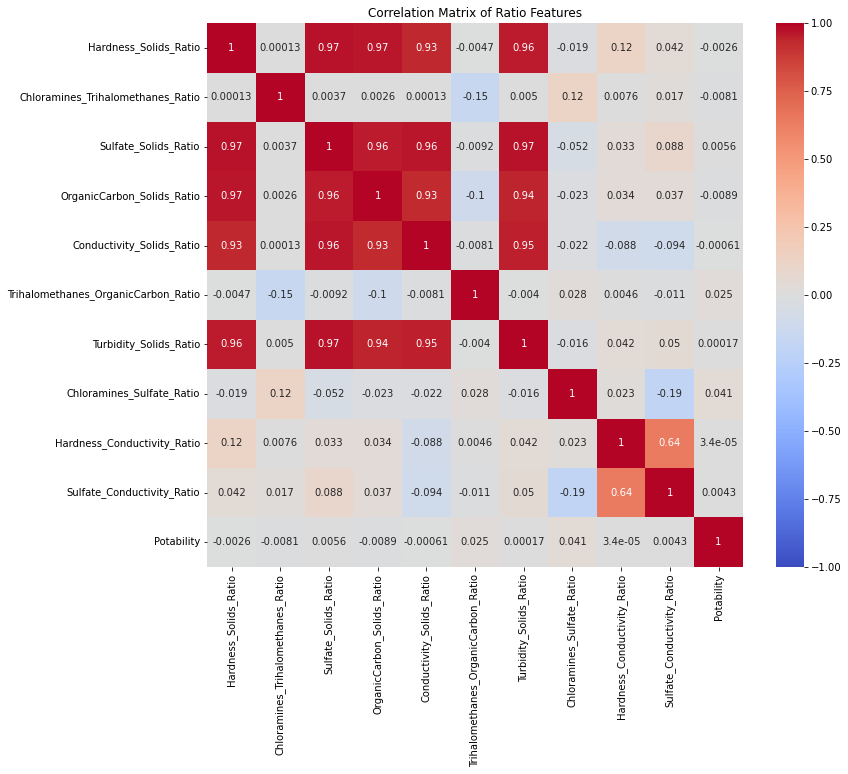

In [48]:
#Visualize for heatMap

plt.figure(figsize=(12, 10))
corr_matrix = df[ratio_features + ['Potability']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Ratio Features')
plt.show()



## The correlation matrix in the image shows the correlation coefficients between different ratio features and the target variable, "Potability." Correlation coefficients range from -1 to 1, where:
- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 indicates no correlation.

#### Key Observations:
1. **High Positive Correlation Among Features**:
   - **Hardness_Solids_Ratio, Sulfate_Solids_Ratio, OrganicCarbon_Solids_Ratio, Conductivity_Solids_Ratio, and Turbidity_Solids_Ratio**:
     - These features are highly positively correlated with each other (correlation coefficients around 0.93 to 0.97). This suggests that in the dataset, these variables tend to increase or decrease together.
   - **Hardness_Conductivity_Ratio and Sulfate_Conductivity_Ratio**:
     - These two ratios are also moderately positively correlated (0.64).

2. **Low to No Correlation with Potability**:
   - Most features have very low correlation with Potability, close to 0, indicating that individually, these features do not have a strong linear relationship with the potability of water.
   - **Chloramines_Sulfate_Ratio** has the highest positive correlation with Potability (0.041), but this is still very low.
   - **Turbidity_Solids_Ratio** shows a slight positive correlation (0.00017).

3. **Negative Correlations**:
   - There are few negative correlations, and they are weak. For example, **Trihalomethanes_OrganicCarbon_Ratio** and **Hardness_Solids_Ratio** show slight negative correlations.


## Feature Engineering Classification:

To improve model performance, we created new features that might better capture the interactions between variables or provide additional meaningful information:

**Interaction Terms:**

- **Create features that capture interactions** between highly correlated variables, such as:
__Hardness_Solids_Ratio * Sulfate_Solids_Ratio__;
__OrganicCarbon_Solids_Ratio * Conductivity_Solids_Ratio__

**Non-linear Transformations:**

- **Apply non-linear transformations** to existing features, such as:
 __log(Hardness_Solids_Ratio)__;
__sqrt(Conductivity_Solids_Ratio)__

**From the correlation matrix, we can identify the pairs of features with high correlation coefficients (both positive and negative). Generally, a correlation coefficient above 0.7 or below -0.7 is considered strong.**

- **Interaction Terms with High Correlation** <br>
1. **Hardness_Solids_Ratio and Sulfate_Solids_Ratio (0.97)** <br>
2. **Hardness_Solids_Ratio and OrganicCarbon_Solids_Ratio (0.97)** <br>
3. **Hardness_Solids_Ratio and Conductivity_Solids_Ratio (0.93)**
4. **Hardness_Solids_Ratio and Turbidity_Solids_Ratio (0.96)**
5. **Sulfate_Solids_Ratio and OrganicCarbon_Solids_Ratio (0.96)**
6. **Sulfate_Solids_Ratio and Conductivity_Solids_Ratio (0.96)**
7. **Sulfate_Solids_Ratio and Turbidity_Solids_Ratio (0.96)**
8. **OrganicCarbon_Solids_Ratio and Conductivity_Solids_Ratio (0.93)**
9. **OrganicCarbon_Solids_Ratio and Turbidity_Solids_Ratio (0.93)**
10. **Conductivity_Solids_Ratio and Turbidity_Solids_Ratio (0.95)** <br>

These pairs are potential candidates for interaction terms because their high correlation indicates a significant relationship, which could improve the predictive power of our model.


In [49]:
#creating features for interactions between ratio features.
df['Hardness_Sulfate_Interaction'] = df['Hardness_Solids_Ratio'] * df['Sulfate_Solids_Ratio']
df['Hardness_OrganicCarbon_Interaction'] = df['Hardness_Solids_Ratio'] * df['OrganicCarbon_Solids_Ratio']
df['Hardness_Conductivity_Interaction'] = df['Hardness_Solids_Ratio'] * df['Conductivity_Solids_Ratio']
df['Hardness_Turbidity_Interaction'] = df['Hardness_Solids_Ratio'] * df['Turbidity_Solids_Ratio']
df['Sulfate_OrganicCarbon_Interaction'] = df['Sulfate_Solids_Ratio'] * df['OrganicCarbon_Solids_Ratio']
df['Sulfate_Conductivity_Interaction'] = df['Sulfate_Solids_Ratio'] * df['Conductivity_Solids_Ratio']
df['Sulfate_Turbidity_Interaction'] = df['Sulfate_Solids_Ratio'] * df['Turbidity_Solids_Ratio']
df['OrganicCarbon_Conductivity_Interaction'] = df['OrganicCarbon_Solids_Ratio'] * df['Conductivity_Solids_Ratio']
df['OrganicCarbon_Turbidity_Interaction'] = df['OrganicCarbon_Solids_Ratio'] * df['Turbidity_Solids_Ratio']
df['Conductivity_Turbidity_Interaction'] = df['Conductivity_Solids_Ratio'] * df['Turbidity_Solids_Ratio']


In [50]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Hardness_Sulfate_Interaction  Hardness_OrganicCarbon_Interaction  \
0                      0.000175                            0.000005   
1                      0.000124                            0.000006   
2                      0.000189                            0.000010   
3                      0.000158                            0.000008   
4                      0.000174                            0.000006   

   Hardness_Conductivity_Interaction  Hardness_Turbidity_Interaction  \
0                           0.000267                        0.000001   
1                           0.000221                        0.000002   
2                           0.000237                        0.000002   
3                           0.000161                        0.000002   
4                           0.000223                        0.000002   

   Sulfate_OrganicCarbon_Interaction  Sulfate_Conductivity_Interaction  \
0                           0.000009                          0.000481   
1                           0.000015                          0.000570   
2                           0.000014                          0.000352   
3                           0.000014                          0.000267   
4                           0.000011                          0.000382   

   Sulfate_Turbidity_Interaction  OrganicCarbon_Conductivity_Interaction  \
0                       0.000003                                0.000014   
1                       0.000004                                0.000026   
2                       0.000003                                0.000018   
3                       0.000003                                0.000014   
4                       0.000004                                0.000014   

   OrganicCarbon_Turbidity_Interaction  Conductivity_Turbidity_Interaction  
0                         7.115013e-08                            0.000004  
1                         1.968428e-07                            0.000008  
2                         1.300473e-07                            0.000003  
3                         1.760243e-07                            0.000003  
4                         1.457130e-07                            0.000005  

[5 rows x 39 columns]

In [51]:
# Create a new hardness columns
df.loc[(df['Hardness'] >= 10) & (df['Hardness'] < 50), 'New_Hardness'] = 'Soft water'
df.loc[(df['Hardness'] >= 50) & (df['Hardness'] < 100), 'New_Hardness'] = 'Slightly hard water'
df.loc[(df['Hardness'] >= 100) & (df['Hardness'] < 200), 'New_Hardness'] = 'Hard water'
df.loc[(df['Hardness'] >= 200), 'New_Hardness'] = 'Very hard water'

In [52]:

# Create a new pH columns
df.loc[(df['ph'] < 7), 'New_ph'] = 'Acid'
df.loc[(df['ph'] == 7), 'New_ph'] = 'Neutral'
df.loc[(df['ph'] > 7), 'New_ph'] = 'Alkaline'

In [53]:

# Converting categoral values to numerical values
Hardness_map = {
    'Very hard water':0, 'Hard water':1, 'Slightly hard water':2,
       'Soft water':3
}
df['New_Hardness'] = df['New_Hardness'].map(Hardness_map)

ph_map = {
    'Acid':0, 'Alkaline':1}
df['New_ph'] = df['New_ph'].map(ph_map)

In [54]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  ...  \
0       10.379783        86.990970   2.963135           0  ...   
1       15.180013        56.329076   4.500656           0  ...   
2       16.868637        66.420093   3.055934           0  ...   
3       18.436524       100.341674   4.628771           0  ...   
4       11.558279        31.997993   4.075075           0  ...   

   Hardness_Conductivity_Interaction  Hardness_Turbidity_Interaction  \
0                           0.000267                        0.000001   
1                           0.000221                        0.000002   
2                           0.000237                        0.000002   
3                           0.000161                        0.000002   
4                           0.000223                        0.000002   

   Sulfate_OrganicCarbon_Interaction  Sulfate_Conductivity_Interaction  \
0                           0.000009                          0.000481   
1                           0.000015                          0.000570   
2                           0.000014                          0.000352   
3                           0.000014                          0.000267   
4                           0.000011                          0.000382   

   Sulfate_Turbidity_Interaction  OrganicCarbon_Conductivity_Interaction  \
0                       0.000003                                0.000014   
1                       0.000004                                0.000026   
2                       0.000003                                0.000018   
3                       0.000003                                0.000014   
4                       0.000004                                0.000014   

   OrganicCarbon_Turbidity_Interaction  Conductivity_Turbidity_Interaction  \
0                         7.115013e-08                            0.000004   
1                         1.968428e-07                            0.000008   
2                         1.300473e-07                            0.000003   
3                         1.760243e-07                            0.000003   
4                         1.457130e-07                            0.000005   

   New_Hardness  New_ph  
0             0       1  
1             1       0  
2             0       1  
3             0       1  
4             1       1  

[5 rows x 41 columns]

In [55]:
#checking for missing values

print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 ph                                        0
Hardness                                  0
Solids                                    0
Chloramines                               0
Sulfate                                   0
Conductivity                              0
Organic_carbon                            0
Trihalomethanes                           0
Turbidity                                 0
Potability                                0
Hardness_Organic_Carbon                   0
Hardness_Conductivity                     0
Chloramines_Organic_carbon                0
Sulfate_Hardness                          0
Turbidity_Solids                          0
Sulfate_Conductivity                      0
ph_Hardness                               0
ph_Conductivity                           0
Solids_Conductivity                       0
Hardness_Solids_Ratio                     0
Chloramines_Trihalomethanes_Ratio         0
Sulfate_Solids_Ratio                      0
Orga

#### Since there are no missing or empty values or cells, we can proceed to feature scaling

In [56]:
## feature scaling to normalize the datasets
scaler = StandardScaler()
X = df.drop(columns=['Potability'])
y = df['Potability']
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Train-Test data ratio allocation
* Train data = 80% while
* Test data = 20%

**Split your dataset into training and testing.**

In [57]:
#Train-Test Split
#Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

####  Model Selection and Training

In [ ]:
# Define base learners (already defined in your prompt)
log_model = LogisticRegression(max_iter=1000)
xgb_model = XGBClassifier()
svc_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100)
lgb_model = GradientBoostingClassifier()  # LightGBM can be implemented using LGBMClassifier

# Create a dictionary to store model names and evaluation results
models = {
    'Logistic Regression': log_model,
    'XGBoost': xgb_model,
    'SVC': svc_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'LightGBM': lgb_model  
}

# Evaluate each model
for model_name, model in models.items():
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on testing data
  predictions = model.predict(X_test)

  # Calculate Accuracy, Precision, Recall, F1_Score
  Accuracy = accuracy_score(y_test, predictions)
  Precision = precision_score(y_test, predictions)
  Recall = recall_score(y_test, predictions)
  F1_Score = f1_score(y_test, predictions)

  # Print evaluation results for each model
  print(f"\n{model_name} Evaluation:")
  print(f"  - Accuracy: {Accuracy:.4f}")
  print(f"  - Precision: {Precision:.4f}")
  print(f"  - Recall: {Recall:.4f}")
  print(f"  - F1 Score: {F1_Score:.4f}")


Logistic Regression Evaluation:
  - Accuracy: 0.6341
  - Precision: 0.7667
  - Recall: 0.0898
  - F1 Score: 0.1608


In [ ]:
zsf

In [ ]:
# Initialize models to Introduce more classification models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', min_samples_split=8, splitter='best'),
    'svm': SVC()
}

In [ ]:
# Train Models
for name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
# Evaluate Models
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

In [ ]:
# Print Results
for name, metrics in results.items():
    print(f"Results for {name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Confusion Matrix:\n {metrics['Confusion Matrix']}")
    print(f"Classification Report:\n {metrics['Classification Report']}\n")

# Hyperparameters Tuning

In [ ]:


# Define hyperparameters for tuning
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8, 10, None]
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'linear']
    }
}

In [ ]:
best_params = {}
for name, model in models.items():
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params[name] = grid_search.best_params_

In [ ]:
# Train Best Models
for name, params in best_params.items():
    models[name] = models[name].set_params(**params)
    models[name].fit(X_train, y_train)

In [ ]:
# Final Evaluation
tuned_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    tuned_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

In [ ]:
# Print Final Results
for name, metrics in tuned_results.items():
    print(f"Final Results for {name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"Confusion Matrix:\n {metrics['Confusion Matrix']}")
    print(f"Classification Report:\n {metrics['Classification Report']}\n")

### Plotting the modelled results for comparison

In [ ]:
# Define the results for each model
model_results = {
    'Logistic Regression': {
        'Accuracy': 0.635670731707317,
        'Precision': 0.6086956521739131,
        'Recall': 0.05737704918032787,
        'F1 Score': 0.10486891385767792
    },
    'Random Forest': {
        'Accuracy': 0.6707317073170732,
        'Precision': 0.6076923076923076,
        'Recall': 0.3237704918032787,
        'F1 Score': 0.4224598930481283
    },
    'Support Vector Classifier': {
        'Accuracy': 0.6859756097560976,
        'Precision': 0.6826923076923077,
        'Recall': 0.29098360655737704,
        'F1 Score': 0.40804597701149425
    },
    'XGBoost': {
        'Accuracy': 0.6234756097560976,
        'Precision': 0.49230769230769234,
        'Recall': 0.39344262295081966,
        'F1 Score': 0.43735763097949887
    },
    'AdaBoost': {
        'Accuracy': 0.6234756097560976,
        'Precision': 0.4878048780487805,
        'Recall': 0.2459016393442623,
        'F1 Score': 0.32697547683923706
    },
    'Decision Tree': {
        'Accuracy': 0.5777439024390244,
        'Precision': 0.4357976653696498,
        'Recall': 0.45901639344262296,
        'F1 Score': 0.4471057884231537
    },
    'SVM': {
        'Accuracy': 0.6859756097560976,
        'Precision': 0.6826923076923077,
        'Recall': 0.29098360655737704,
        'F1 Score': 0.40804597701149425
    }
}

In [ ]:
# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Prepare data for plotting
data = {metric: [model_results[model][metric] for model in model_results] for metric in metrics}
models = list(model_results.keys())

In [ ]:
# Set up the plot
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot each metric
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, data[metric], width, label=metric)

# Add the score numbers to the bars
for container in ax.containers:
    labels = [f'{v:.2f}' for v in container.datavalues]
    ax.bar_label(container, labels=labels)


    # Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Great Job!🥰